In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
excel_reader=pd.ExcelFile('/content/drive/Shareddrives/Spark! and Sustainable Purchasing/WBMason Paper and Toner.xlsx')
sheet_names = excel_reader.sheet_names

In [28]:
df =  excel_reader.parse(sheet_name=sheet_names[1])

In [29]:
df

,Requisition ID,Requisitioning Date,Supplier - ERP Supplier,Description,Requester - Shopper ID,Part - Supplier Part Number,sum(Requisition Spend),LDescription,Category,Year group,trimmed date shoppper part,matchnumber,Unit,Unit name,funds center,fc name
0,SH449754,2018-11-26,WB Mason Company,C-59301110|5821035628|Astrobrights Color Paper...,ANDREAMR,WAU21289,15.29,c-59301110|5821035628|astrobrights color paper...,Paper,2018,43430WAU21289ANDREAMR,29045,ZBU_ORG_U244,SCHOOL OF PUBLIC HEALTH (SPH),2442440000,SPH COMMUNITY HEALTH SCIENCES
1,SH449839,2018-11-26,WB Mason Company,"C-59311433|5821081290|78A, (CE278A) Black Orig...",JMORAN,HEWCE278A,43.75,"c-59311433|5821081290|78a, (ce278a) black orig...",Toner/Ink,2018,43430HEWCE278AJMORAN,28847,ZBU_ORG_U189,EVENTS & CONFERENCES,1890010000,Internal Event Administration
2,SH455528,2018-12-17,WB Mason Company,C-59869171|5823461205|Continuous Paper Label T...,CANNUN,BRTDK2205,39.12,c-59869171|5823461205|continuous paper label t...,Paper,2018,43451BRTDK2205CANNUN,33589,ZBU_ORG_U145,UNIVERSITY LIBRARIES,1450400000,"LIB CATALOG,PROFESSIONAL"
3,SH452999,2018-12-06,WB Mason Company,"C-59620403|5822419340|12A, (Q2612A) Black Orig...",JMALZONE,HEWQ2612A,127.89,"c-59620403|5822419340|12a, (q2612a) black orig...",Toner/Ink,2018,43440HEWQ2612AJMALZONE,31633,ZBU_ORG_U120,COLLEGE OF ARTS AND SCIS (CAS),1202060000,CAS ECONOMICS
4,SH453242,2018-12-06,WB Mason Company,C-59637773|5822492854|70C1HM0 (LEX-701HM) High...,JANEMAH,LEX70C1HM0,136.29,c-59637773|5822492854|70c1hm0 (lex-701hm) high...,Toner/Ink,2018,43440LEX70C1HM0JANEMAH,31656,ZBU_ORG_U257,SCHOOL OF MEDICINE (BUSM),2572020000,BS--BIOCHEMISTRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,PR13081,2020-09-28,WB Mason Company,"30% Recycled Copy Paper, 92 Bright, 20 lb., 8 ...",SARAHBF,WBM20030,171.00,"30% recycled copy paper, 92 bright, 20 lb., 8 ...",Paper,2020,44102WBM20030SARAHBF,no match to bus,no match to bus,no match to bus,no match to bus,no match to bus
7847,PR7995,2020-09-03,WB Mason Company,"78 Extra Bright AND Heavy Copy Paper, 98 Brigh...",CHRISQL,BLZ78200,61.60,"78 extra bright and heavy copy paper, 98 brigh...",Paper,2020,44077BLZ78200CHRISQL,no match to bus,no match to bus,no match to bus,no match to bus,no match to bus
7848,PR8853,2020-09-08,WB Mason Company,"952 Ink Cartridge, Black (F6U15AN)",AMBERFW,HEWF6U15AN,28.04,"952 ink cartridge, black (f6u15an)",Toner/Ink,2020,44082HEWF6U15ANAMBERFW,no match to bus,no match to bus,no match to bus,no match to bus,no match to bus
7849,PR1294,2020-08-05,WB Mason Company,"C-74454871|5881962155|Premium Copy Paper, 92 B...",KPRICCI,WBM21200,25.80,"c-74454871|5881962155|premium copy paper, 92 b...",Paper,2020,44048WBM21200KPRICCI,no match to bus,no match to bus,no match to bus,no match to bus,no match to bus


In [30]:
paper = df[df['Description'].str.contains('Reams')]['Description'].unique()
paper

array(['C-56050265|5806950473|BriteHue Multipurpose Colored Paper, 24lb, 8-1/2 x 11, Green, 500 Sheets/Ream, 10 Reams/Carton',
       'C-56050265|5806951262|Recycled Colored Paper, 20lb, 11 x 17, Blue, 500 Sheets/Ream, 5 Reams/Carton',
       'C-58578304|5817977515|Great White 30 Recycled Copy Paper, 92 Brightness, 20lb, 8-1/2 x 14, 500 Shts/Ream, 10 Reams/CT',
       'Great White 30 Recycled Copy Paper, 92 Brightness, 20lb, 8-1/2 x 14, 500 Shts/Ream, 10 Reams/CT',
       'Tidal Print Paper, 92 Bright, 20lb, 8.5 x 11, White, 500 Sheets/Ream, 3 Reams/Carton'],
      dtype=object)

In [31]:
len(paper)

5

In [32]:
paper_df = df[df['Description'].str.contains('Ream')]

In [33]:
paper_df['Description'].unique()

array(['C-56417606|5808667711|FIREWORX Colored Paper, 20lb, 8-1/2 x 11, Bottle Rocket Blue, 500 Sheets/Ream',
       'C-59489757|5821852877|FIREWORX Colored Paper, 20lb, 8-1/2 x 11, Crackling Canary, 500 Sheets/Ream',
       'C-56050265|5806950473|BriteHue Multipurpose Colored Paper, 24lb, 8-1/2 x 11, Green, 500 Sheets/Ream, 10 Reams/Carton',
       'C-59410909|5821512163|FIREWORX Colored Paper, 20lb, 8-1/2 x 11, Bottle Rocket Blue, 500 Sheets/Ream',
       'C-56050265|5806951262|Recycled Colored Paper, 20lb, 11 x 17, Blue, 500 Sheets/Ream, 5 Reams/Carton',
       'C-58927034|5819472813|FIREWORX Colored Paper, 24lb, 8-1/2 x 11, Bottle Rocket Blue, 500 Sheets/Ream',
       'C-58231079|5816514390|FIREWORX Colored Paper, 20lb, 8-1/2 x 14, Flashing Ivory, 500 Sheets/Ream',
       'C-58261715|5816646430|FIREWORX Colored Paper, 20lb, 8-1/2 x 11, Golden Glimmer, 500 Sheets/Ream',
       'C-59961900|5823845086|FIREWORX Colored Paper, 20lb, 8-1/2 x 11, Popper-mint Green, 500 Sheets/Ream',
     

In [34]:
paper_df['Description'].value_counts()

Array Colored Bond Paper, 24lb, 8-1/2 x 11, Assorted Designer Colors, 500/Ream                             2
Premium Color Copy Paper, 100 Brightness, 28lb, 8 1/2 x 11, Photo White, 500/Ream                          2
C-65524030|5847264483|Copy Plus Copy Paper, 92 Brightness, 20lb, 11 x 17, White, 500 Sheets/Ream           1
C-57933217|5815234660|FIREWORX Colored Paper, 20lb, 8-1/2 x 11, Bottle Rocket Blue, 500 Sheets/Ream        1
C-65566726|5847448972|FIREWORX Colored Paper, 24lb, 8-1/2 x 11, Popper-mint Green, 500 Sheets/Ream         1
                                                                                                          ..
C-66282176|5850459573|FIREWORX Colored Paper, 20lb, 8-1/2 x 11, Golden Glimmer, 500 Sheets/Ream            1
C-65271662|5846204591|FIREWORX Colored Paper, 24lb, 8-1/2 x 11, Lemon Zest, 500 Sheets/Ream                1
C-58337621|5816959929|FIREWORX Colored Paper, 20lb, 8-1/2 x 11, Popper-mint Green, 500 Sheets/Ream         1
C-67089177|58538104

In [35]:
paper_df['Description'].str.split('|', expand=True)[2].str.split(',', expand=True)[0].value_counts()

FIREWORX Colored Paper                         408
Copy Plus Copy Paper                            10
Premium Color Copy Paper                         8
BriteHue Multipurpose Colored Paper              7
Fore MP Multipurpose Paper                       6
Copy Paper                                       6
Recycled Colored Paper                           3
Great White 30 Recycled Copy Paper               2
Rainbow Super Value Construction Paper Ream      1
Deluxe Colored Paper                             1
White Drawing Paper                              1
Name: 0, dtype: int64

In [56]:
def find_thepaper_gap(name):
  for h in name:
    print('"{0}"'.format(h))
    a1=paper_df[paper_df['Description'].str.contains(h)]['Requisitioning Date'].tolist()
    print(type(a1))
    a1 = sorted(a1)

    
    a11 = []
    for i in range(len(a1)-1):
      a11.append((a1[i+1]-a1[i]).days)
    print(set(a11))
    
    arr_mean=(np.mean(a11))
    arr_std=(np.std(a11))

    print("The mean is ：%f" % arr_mean)

    print("The standard div is ：%f" % arr_std)
    plt.plot(range(len(a11)), a11, '-o')
    plt.rcParams["figure.figsize"] = (40,30)
    plt.show()

In [52]:
paper_name = paper_df['Description'].str.split('|', expand=True)[2].str.split(',', expand=True)[0].value_counts()._stat_axis.values.tolist()
paper_name

['FIREWORX Colored Paper',
 'Copy Plus Copy Paper',
 'Premium Color Copy Paper',
 'BriteHue Multipurpose Colored Paper',
 'Fore MP Multipurpose Paper',
 'Copy Paper',
 'Recycled Colored Paper',
 'Great White 30 Recycled Copy Paper',
 'Rainbow Super Value Construction Paper Ream',
 'Deluxe Colored Paper',
 'White Drawing Paper']

"FIREWORX Colored Paper"
<class 'list'>
{0, 1, 2, 3, 4, 5, 6, 7, 8, 194, 9}
The mean is ：1.115479
The standard div is ：9.687446


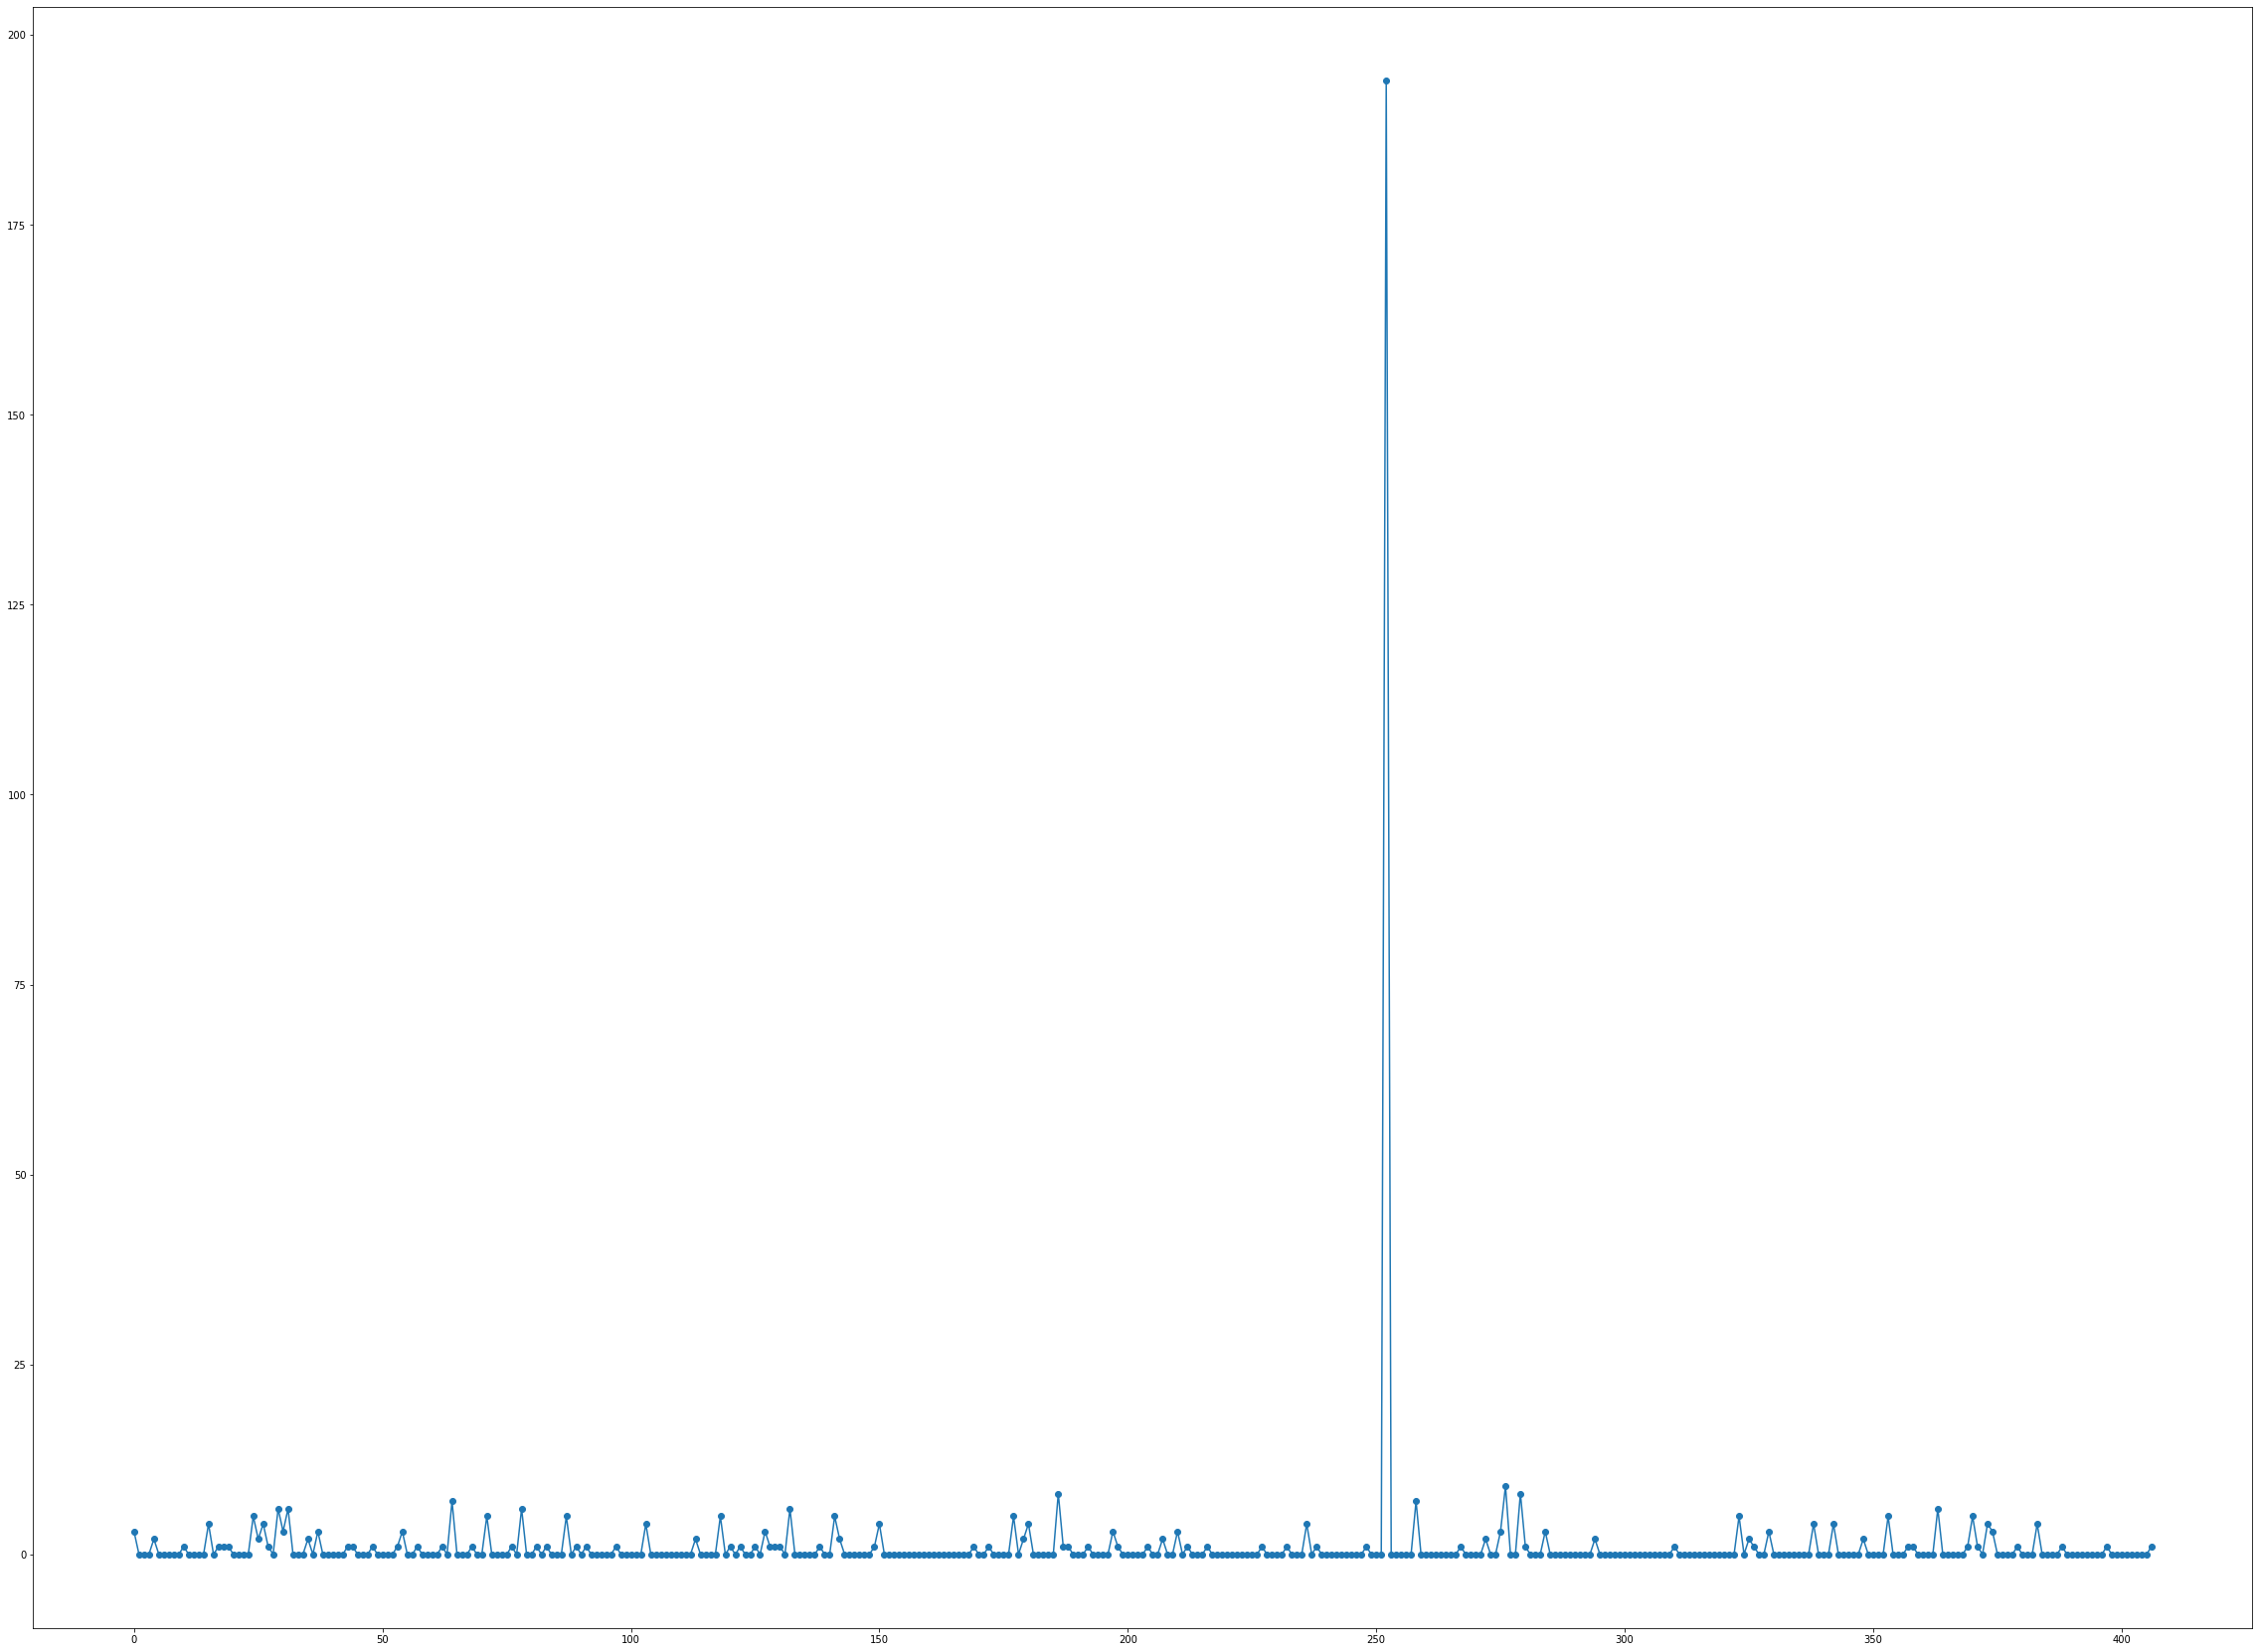

"Copy Plus Copy Paper"
<class 'list'>
{0, 4, 11, 77, 16, 113, 20, 22, 223}
The mean is ：54.000000
The standard div is ：69.490207


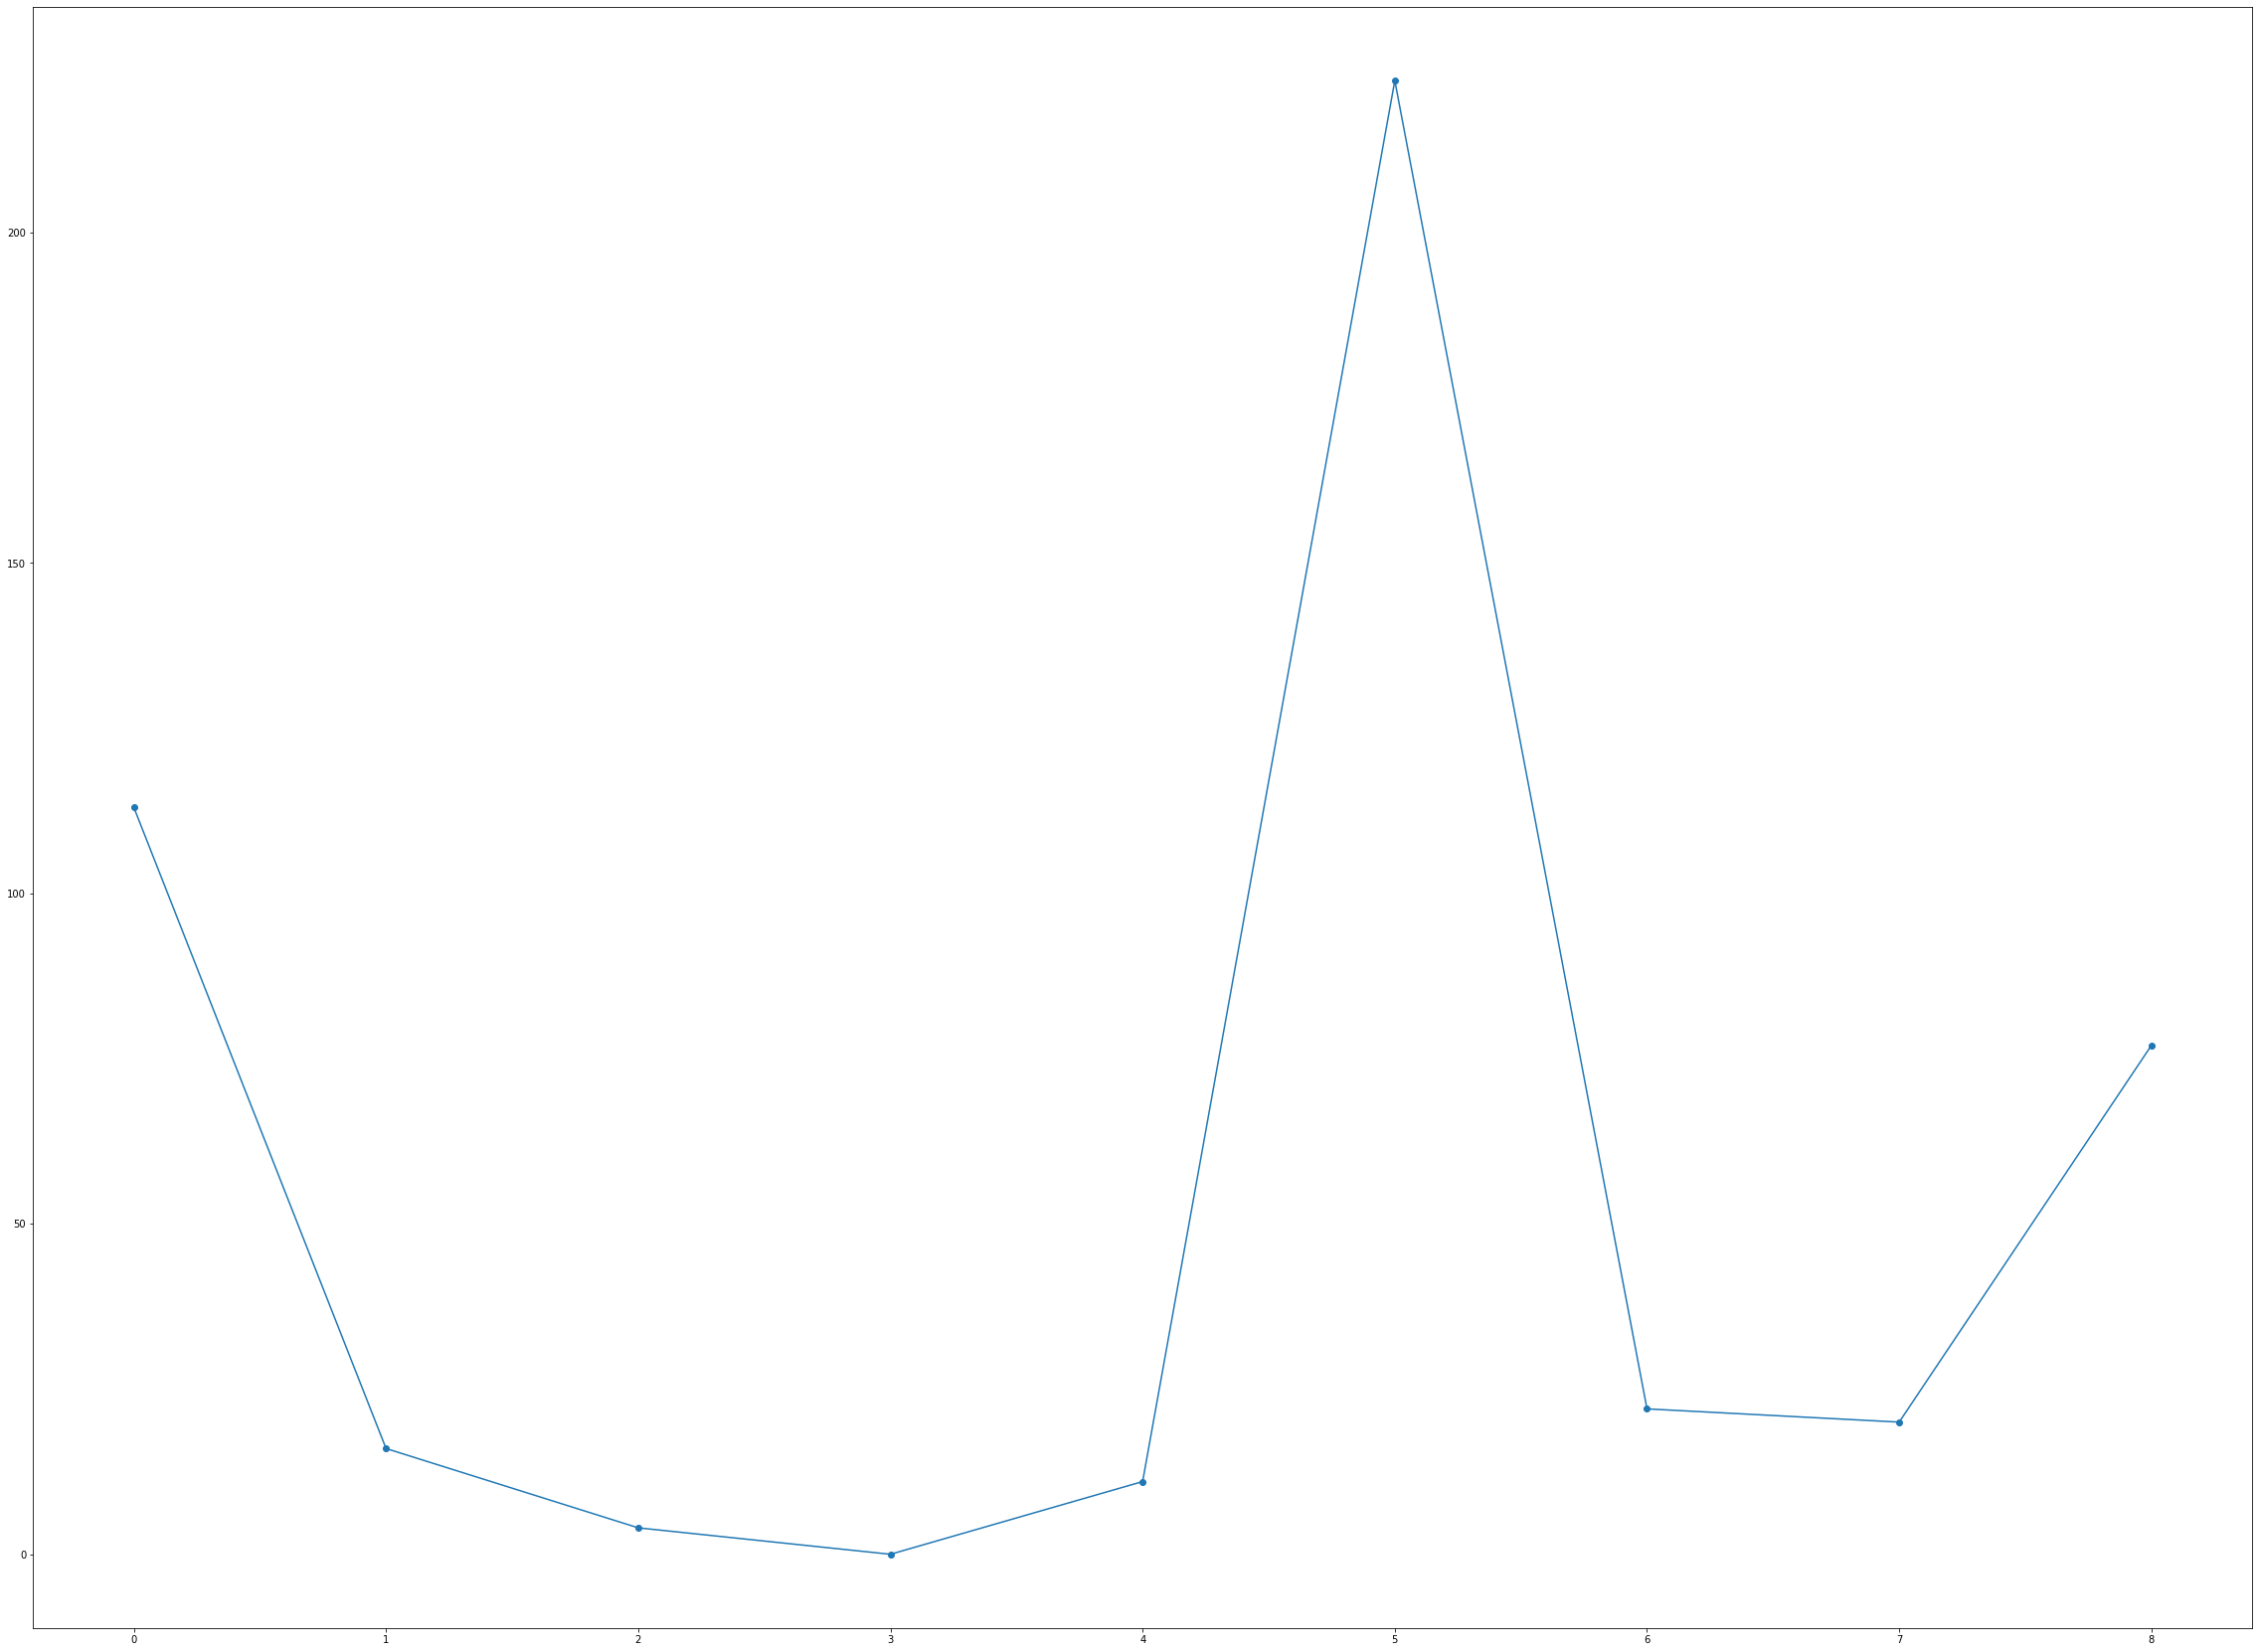

"Premium Color Copy Paper"
<class 'list'>
{0, 33, 2, 36, 68, 6, 50, 287}
The mean is ：53.555556
The standard div is ：85.702471


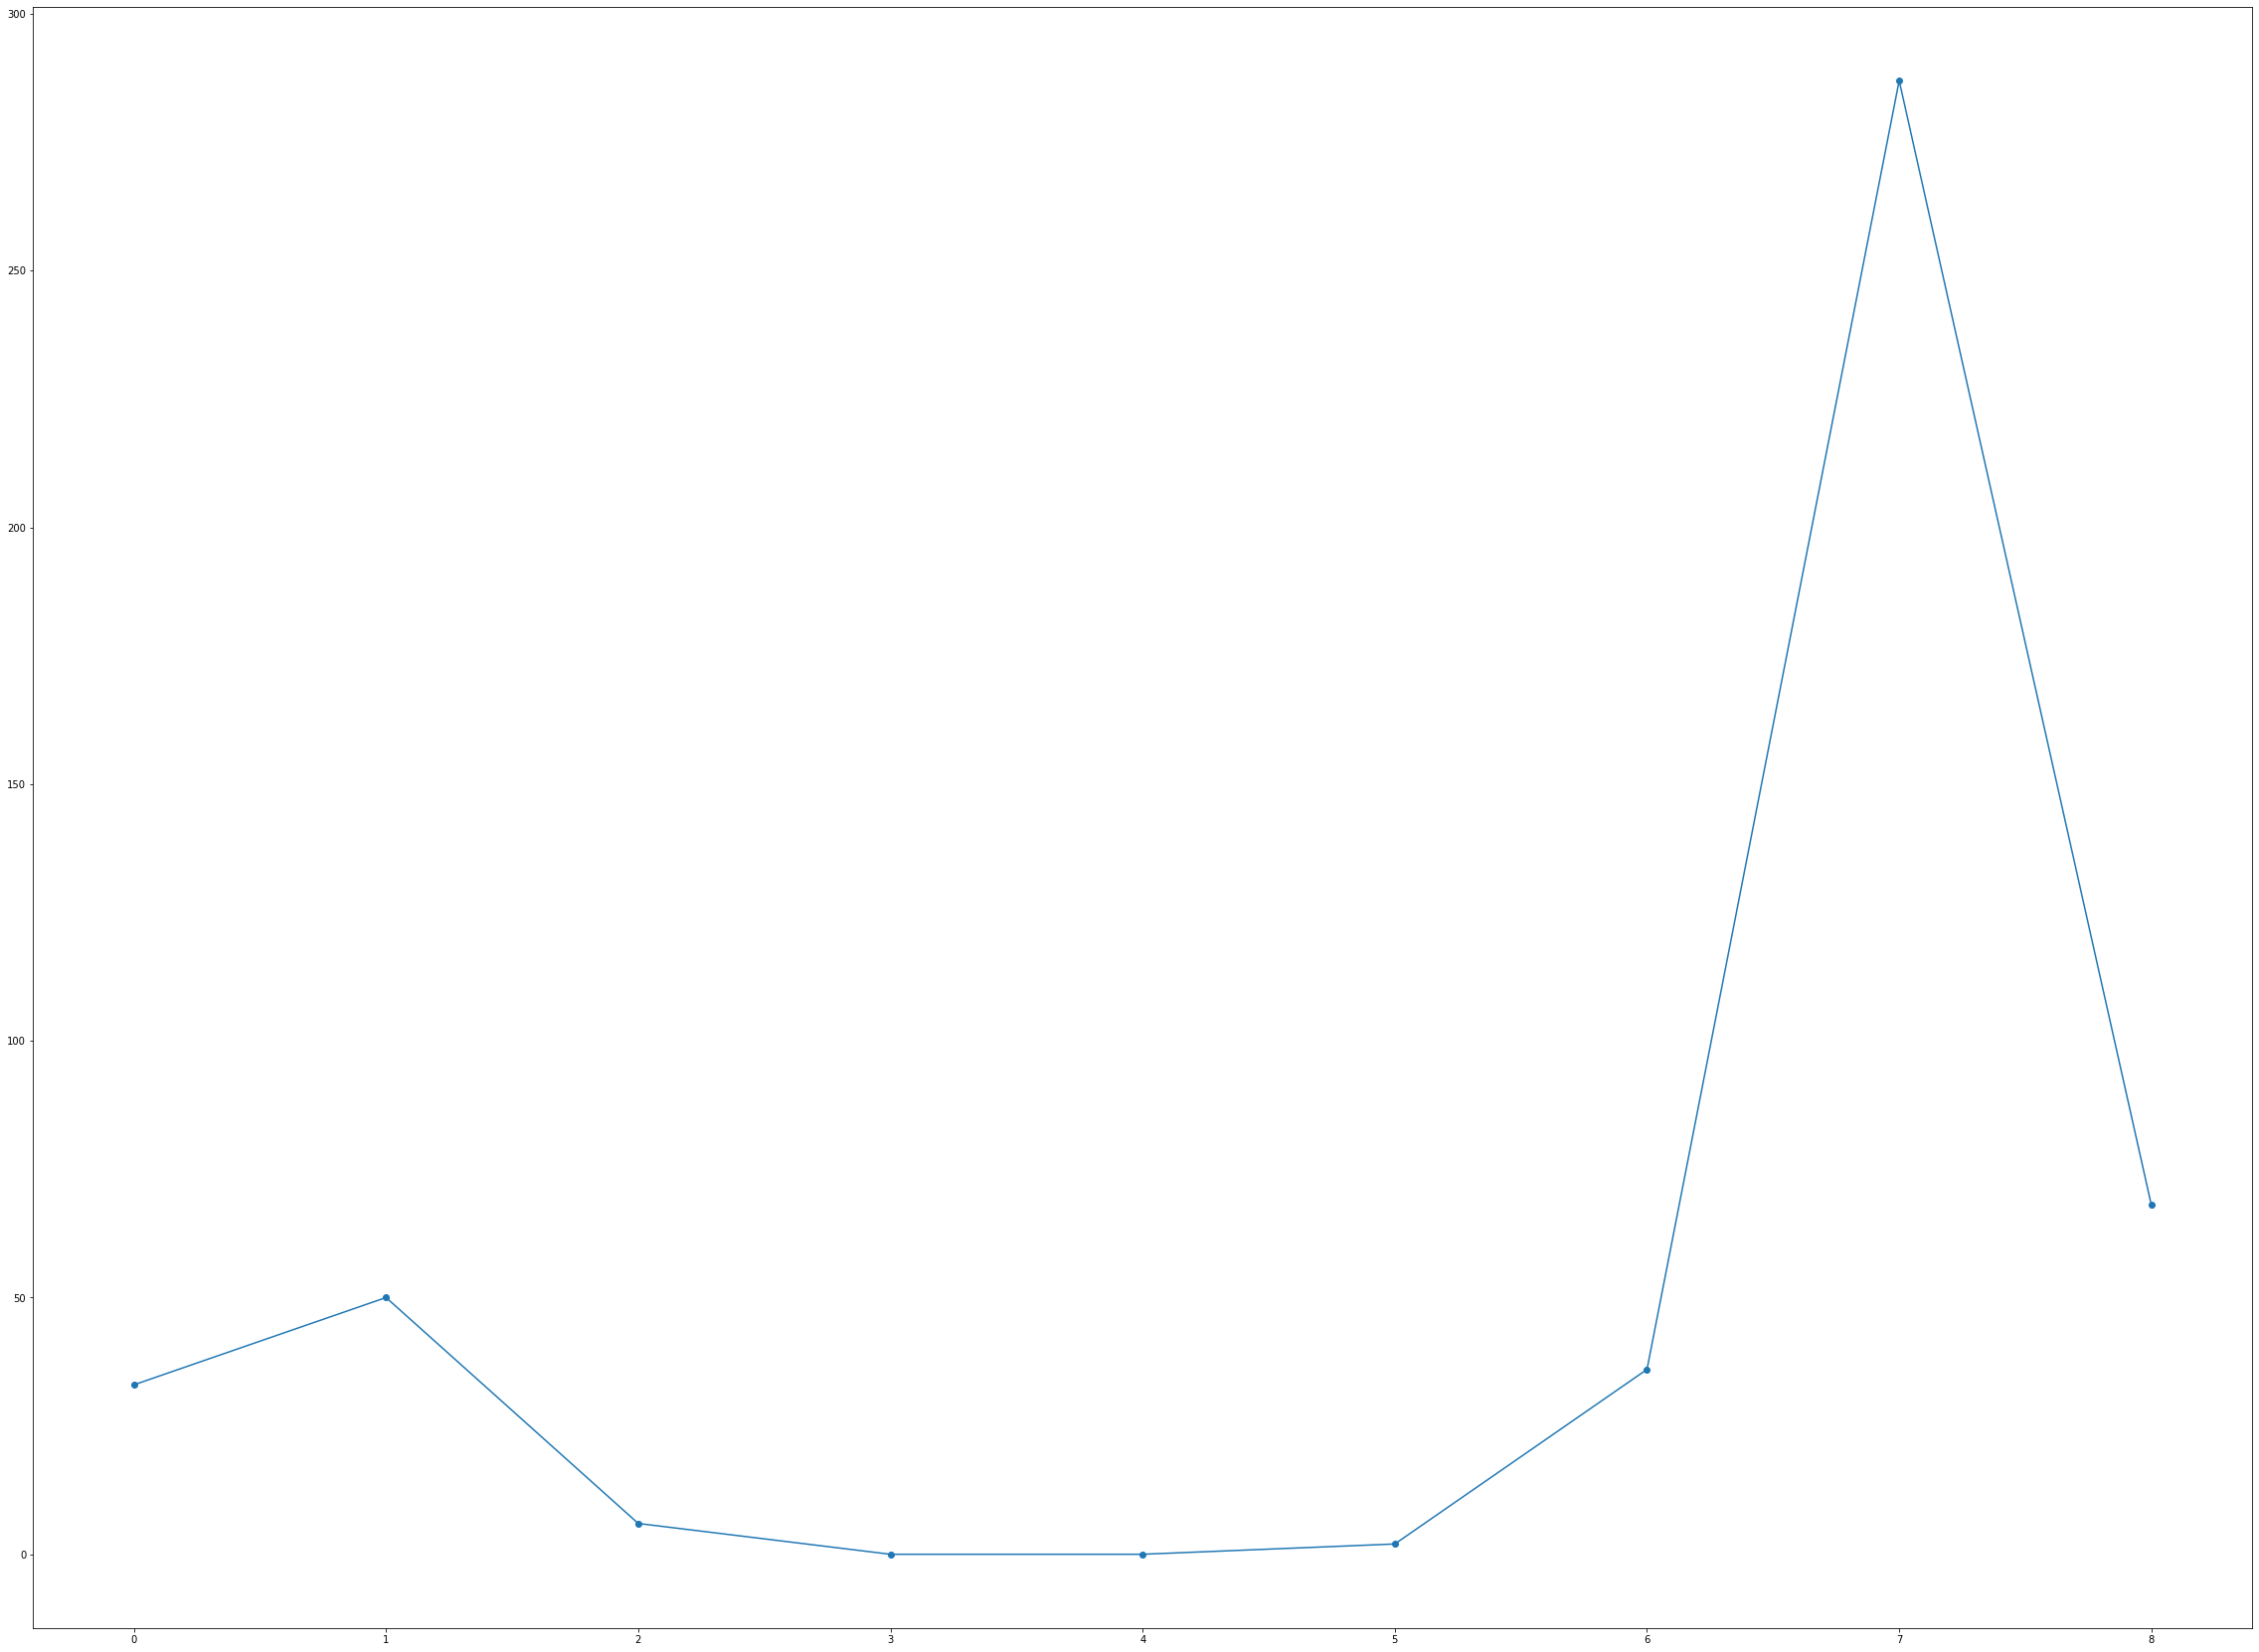

"BriteHue Multipurpose Colored Paper"
<class 'list'>
{0, 49, 1}
The mean is ：8.333333
The standard div is ：18.190352


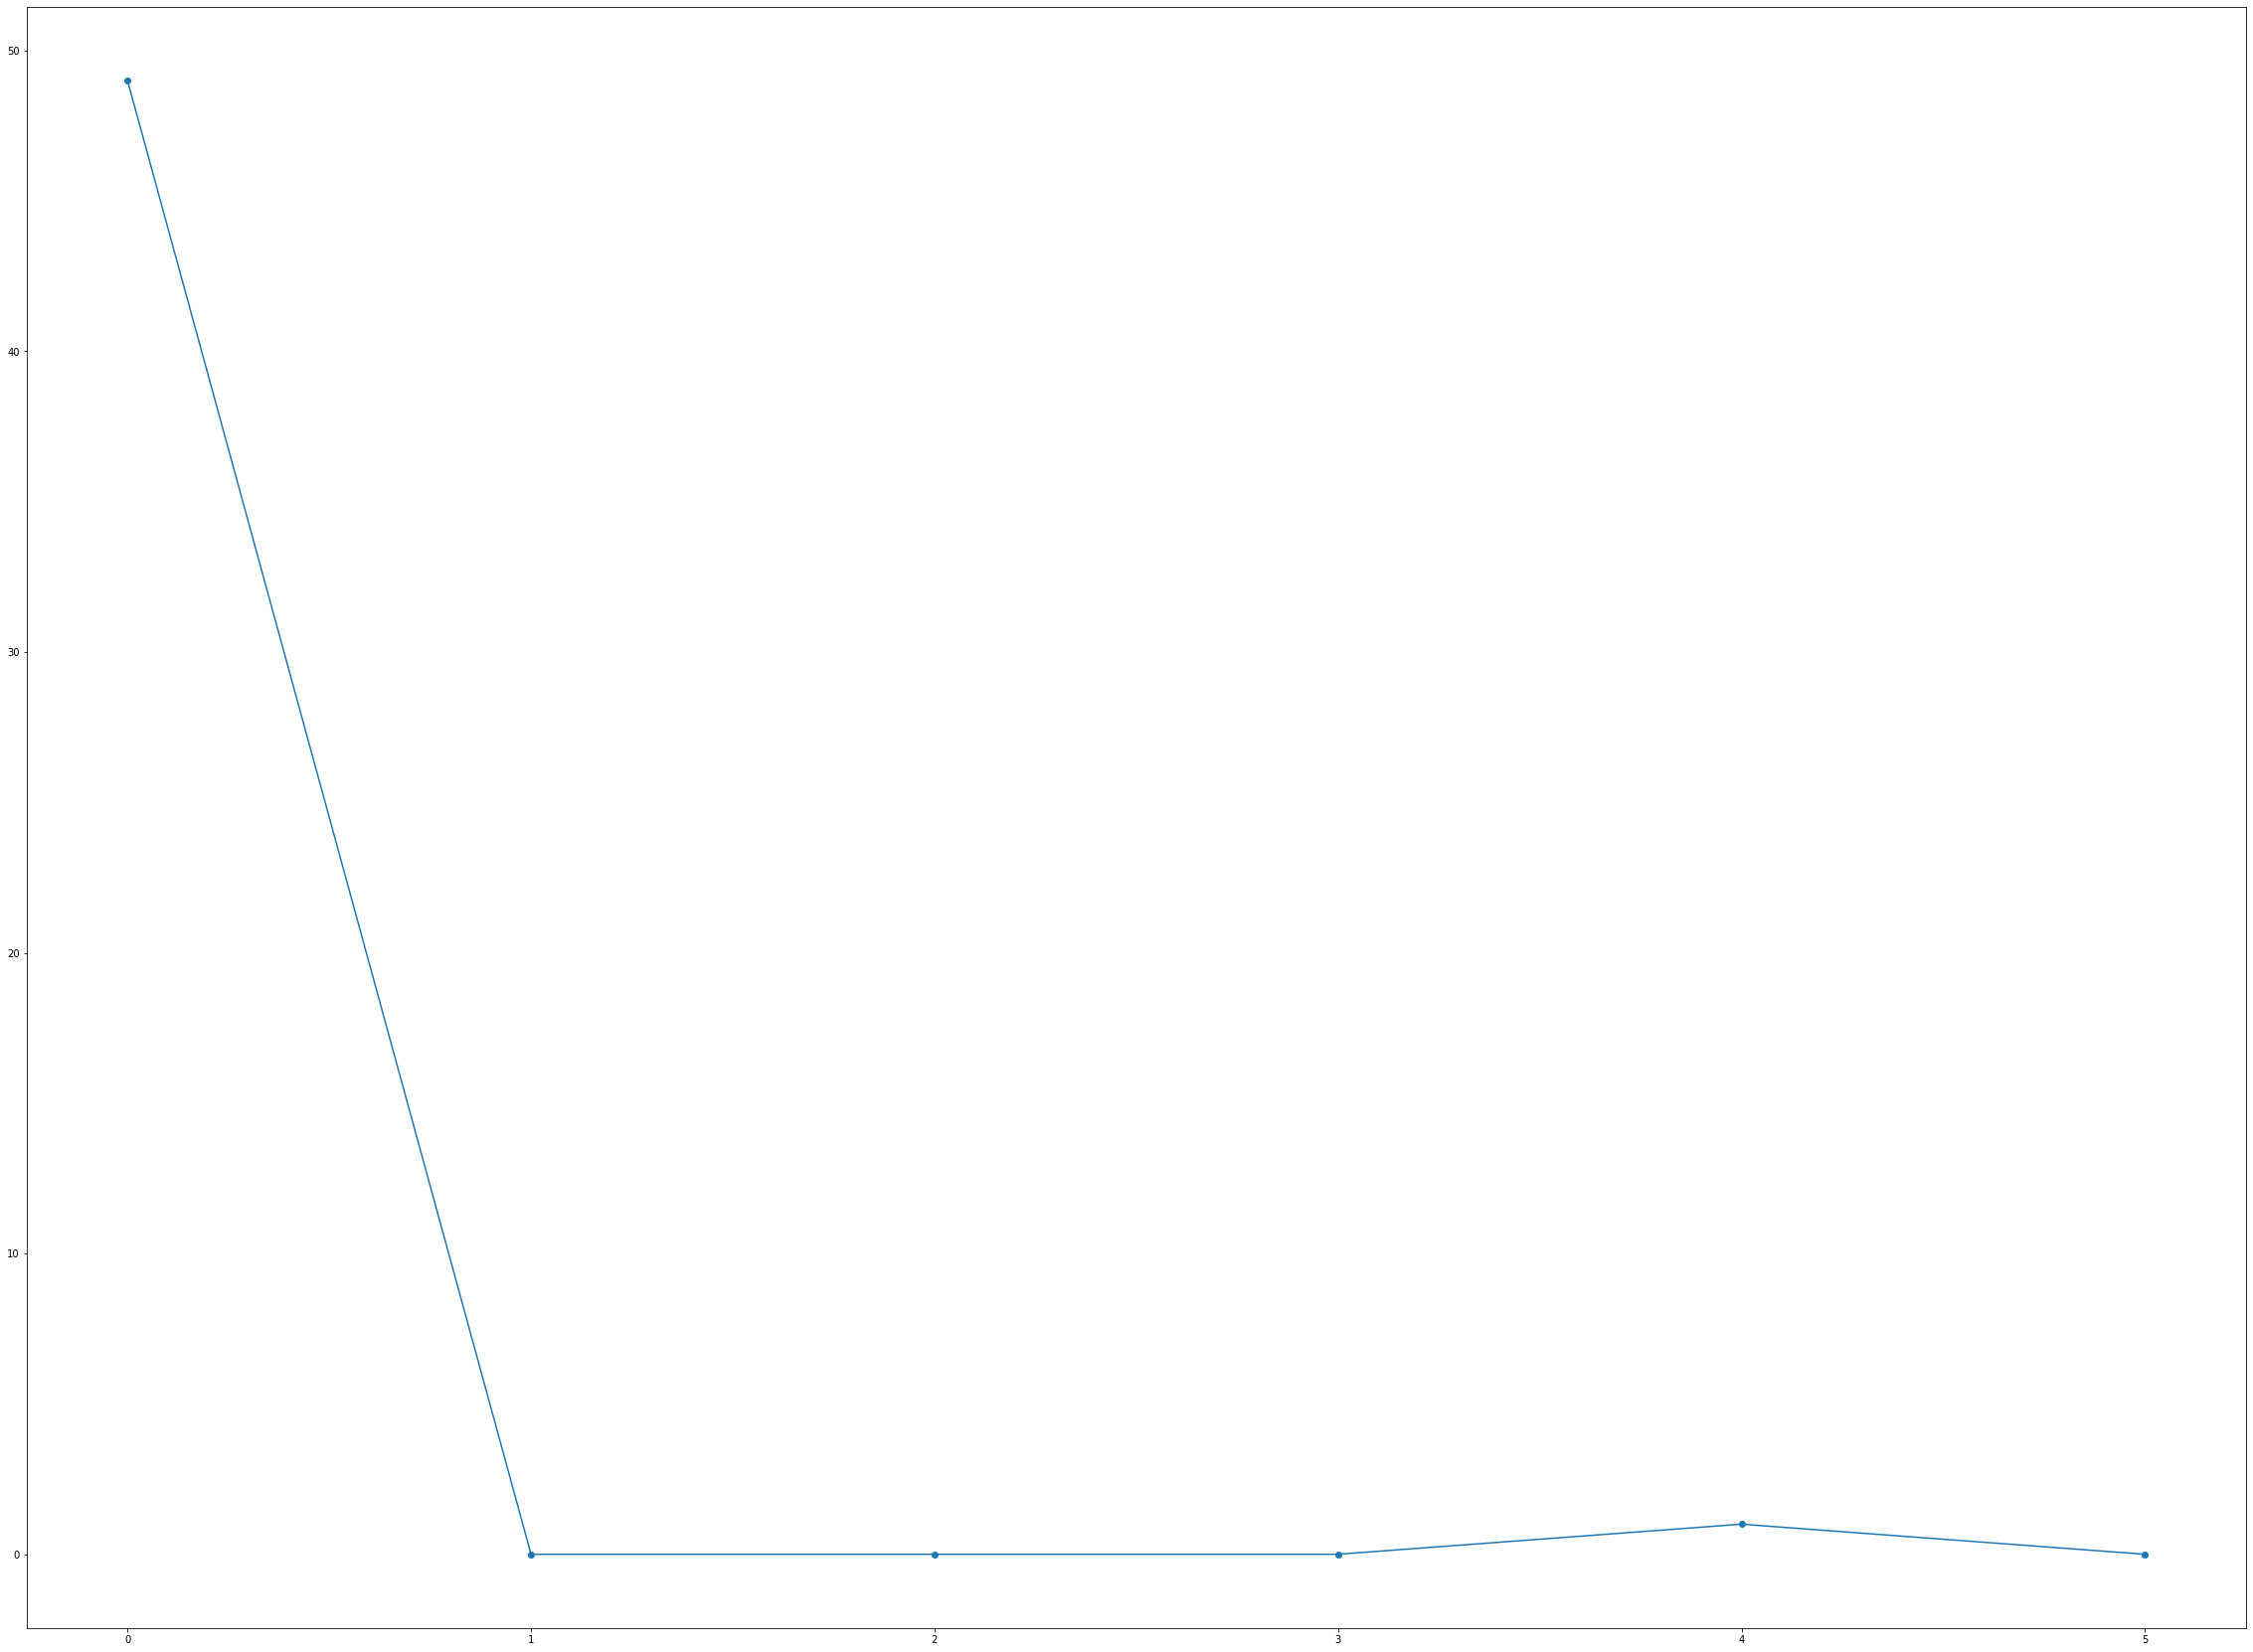

"Fore MP Multipurpose Paper"
<class 'list'>
{304, 57, 13, 33}
The mean is ：84.000000
The standard div is ：111.186330


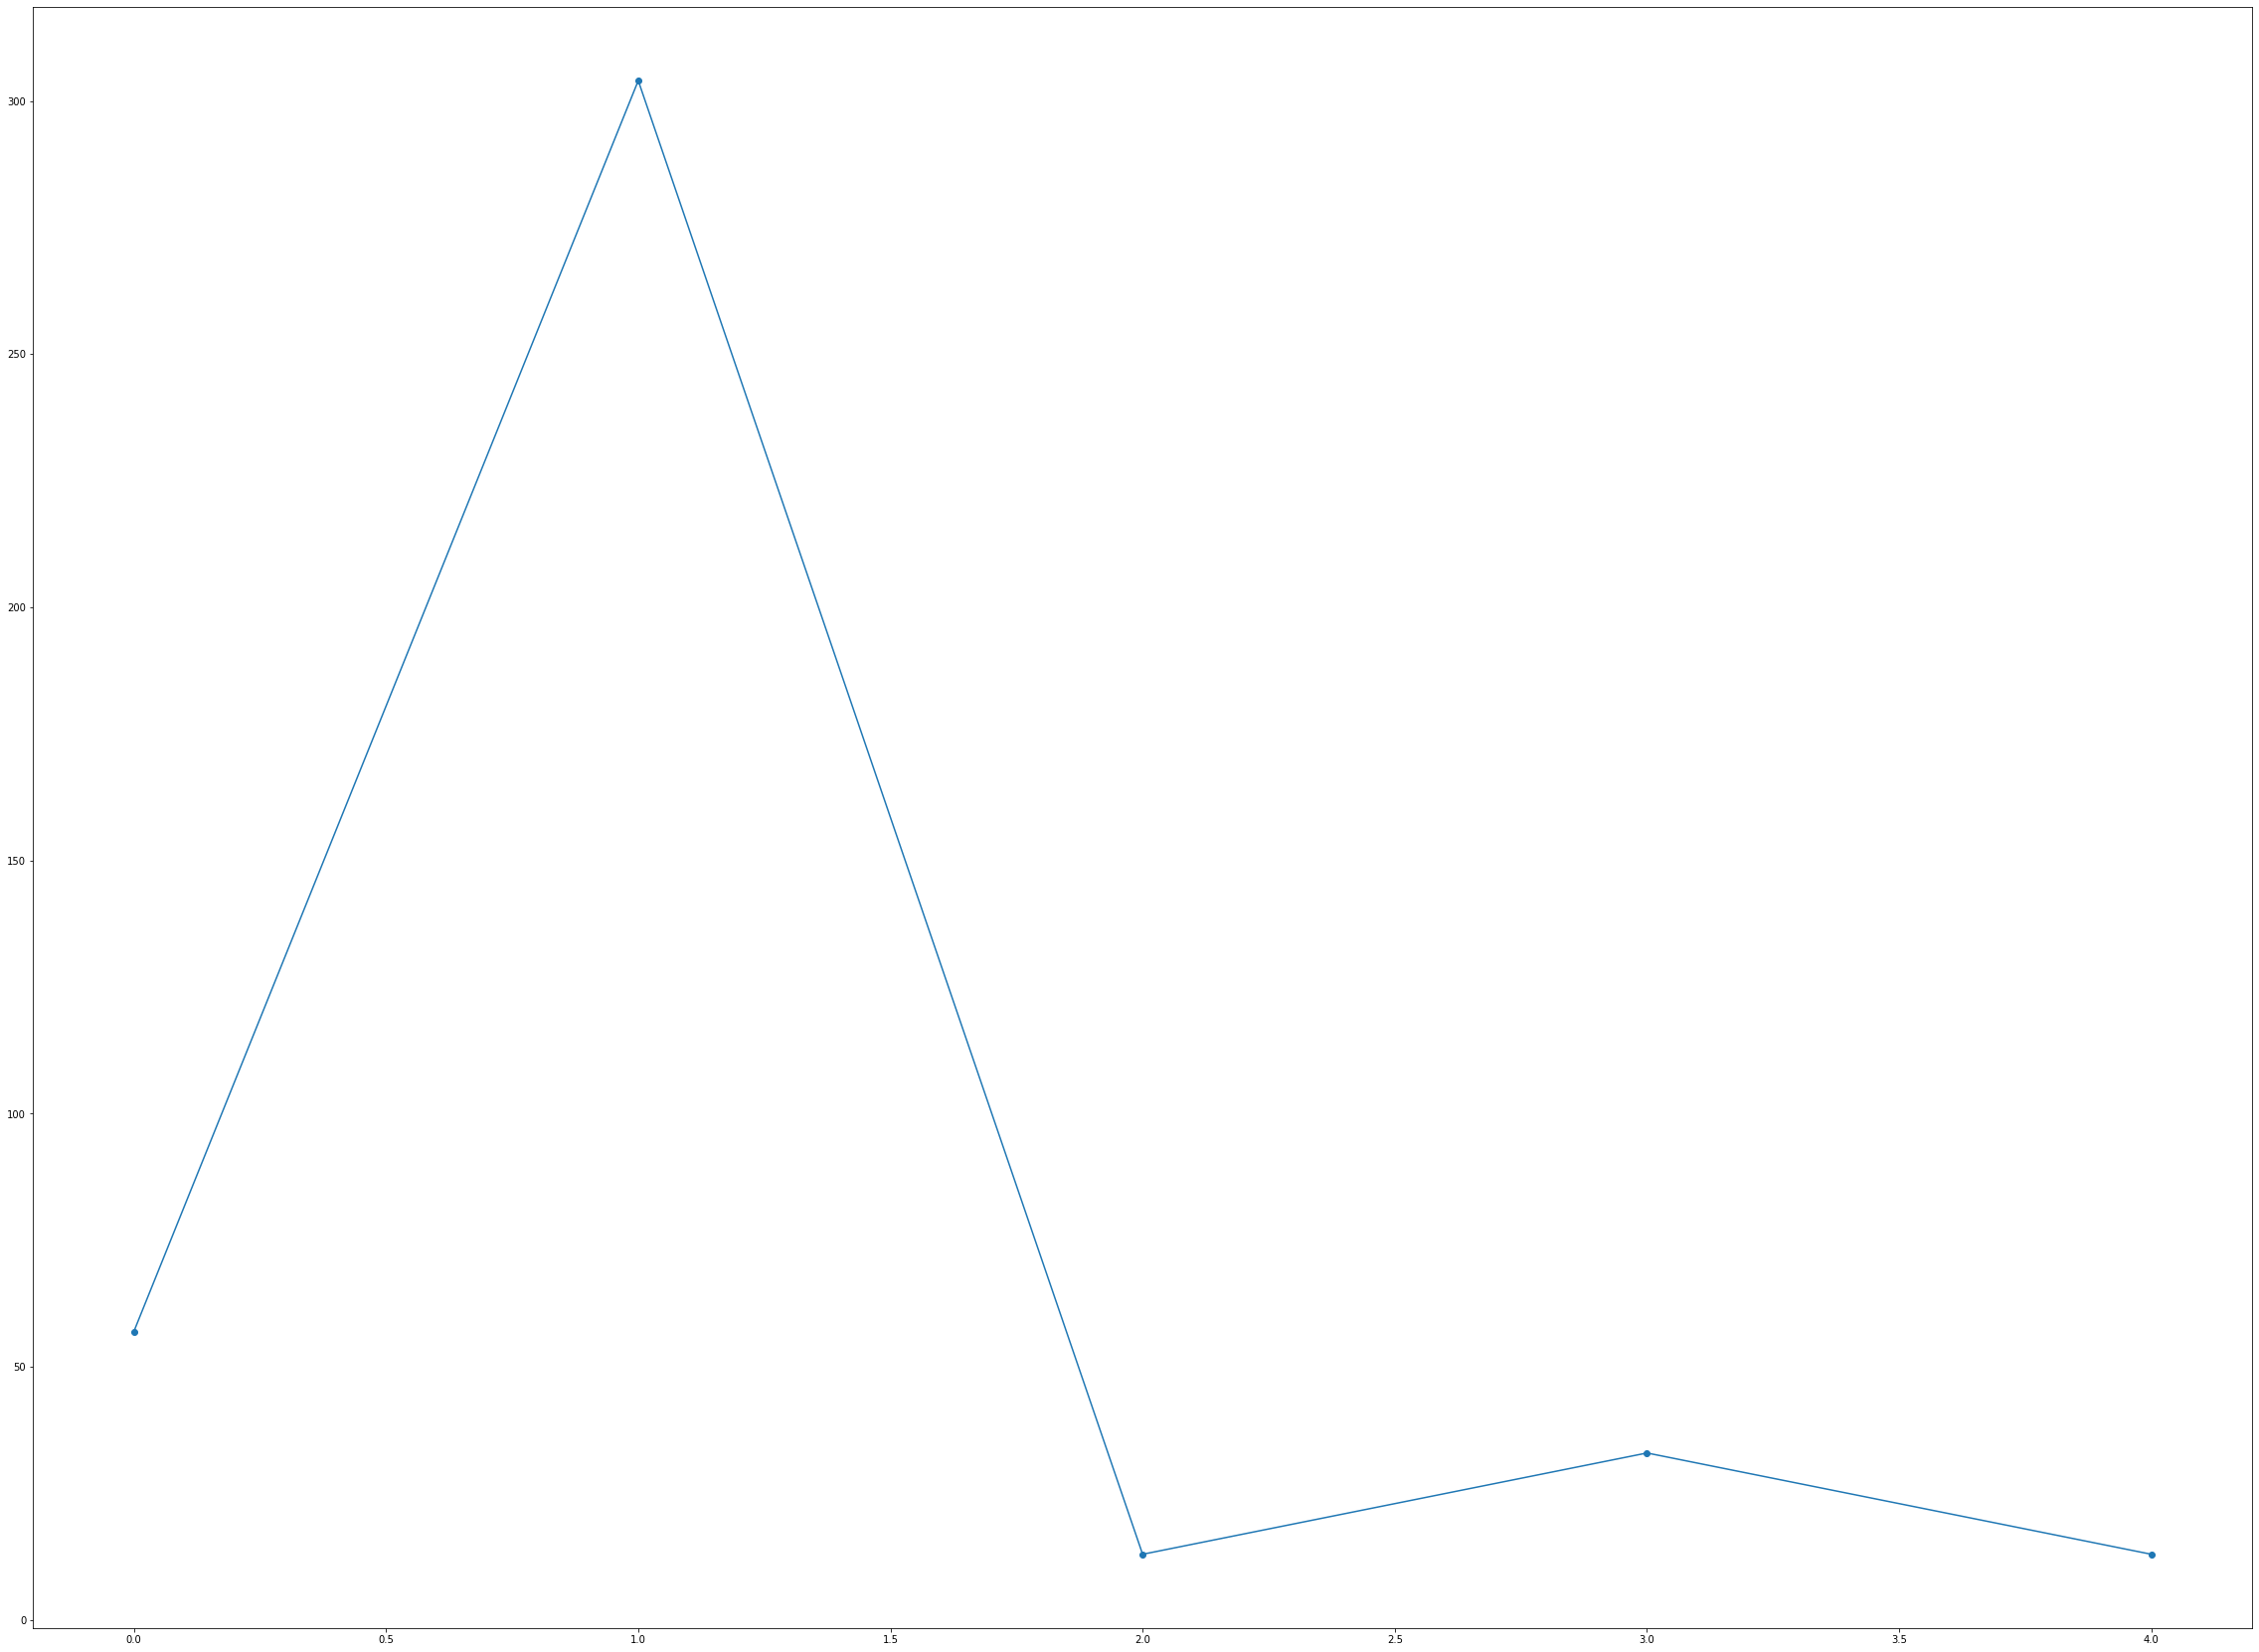

"Copy Paper"
<class 'list'>
{0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 17, 22, 287, 33, 36, 42, 65, 67, 210}
The mean is ：30.035714
The standard div is ：64.155771


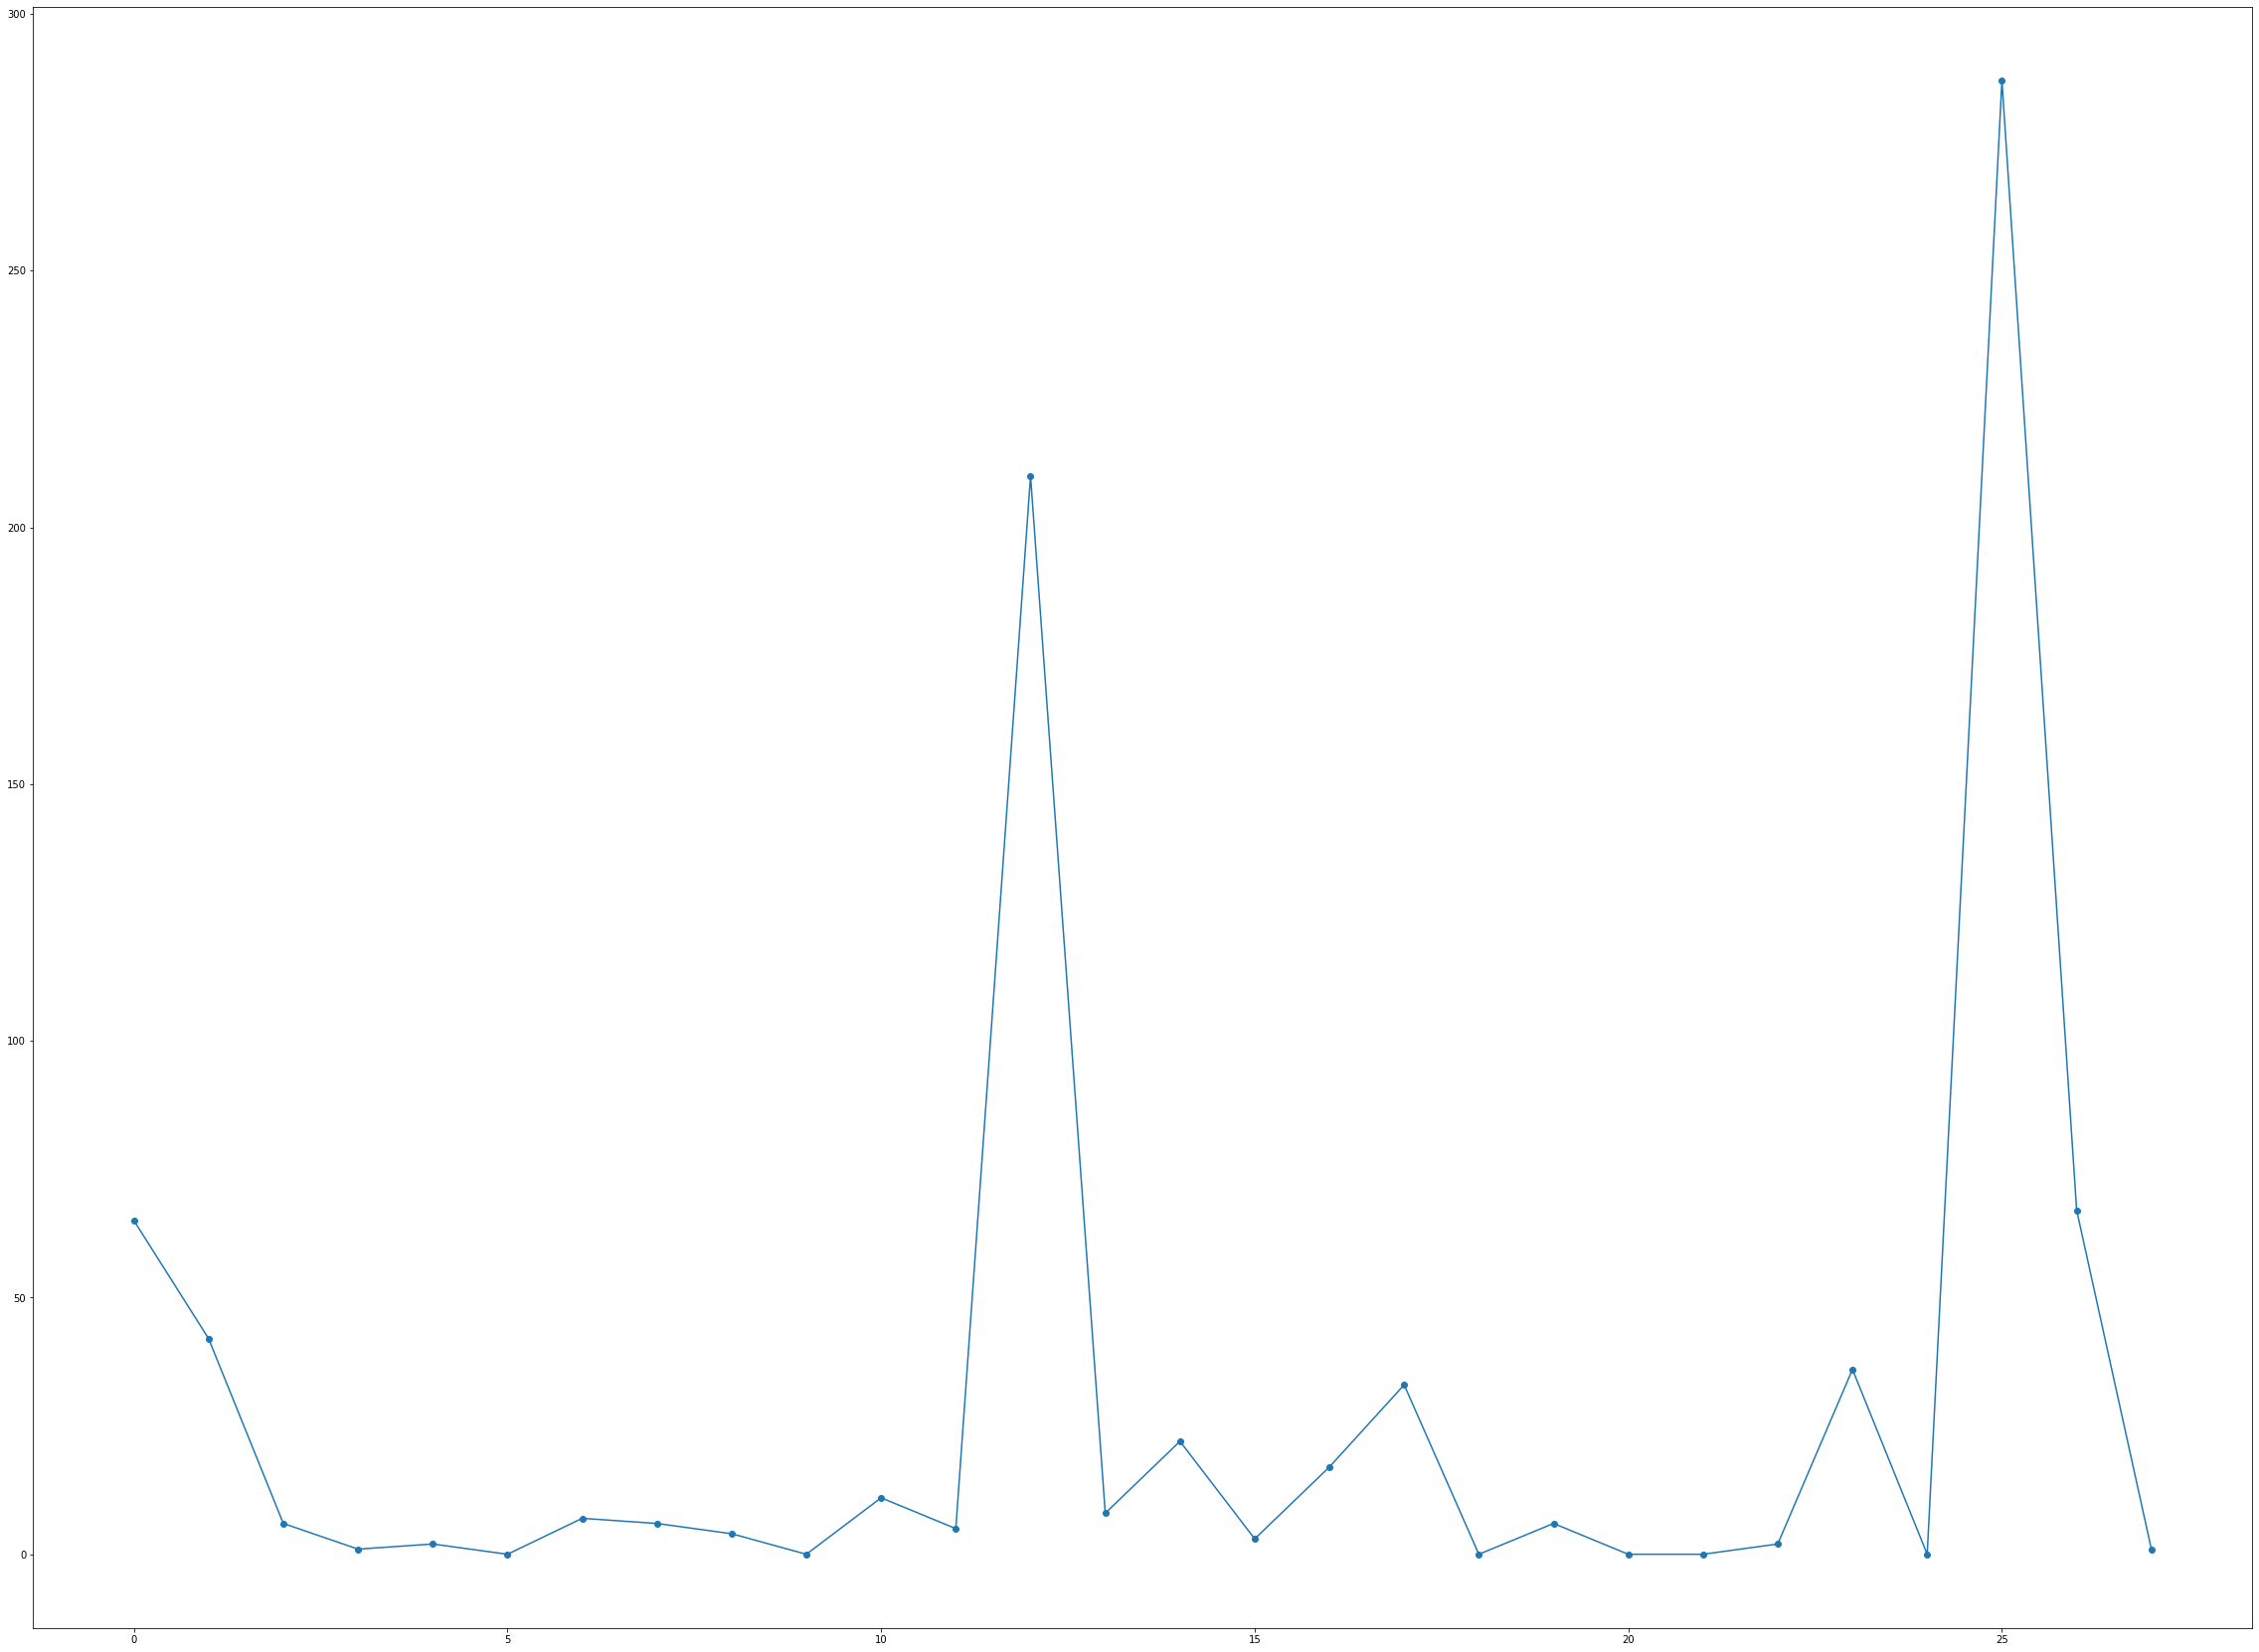

"Recycled Colored Paper"
<class 'list'>
{352, 126}
The mean is ：239.000000
The standard div is ：113.000000


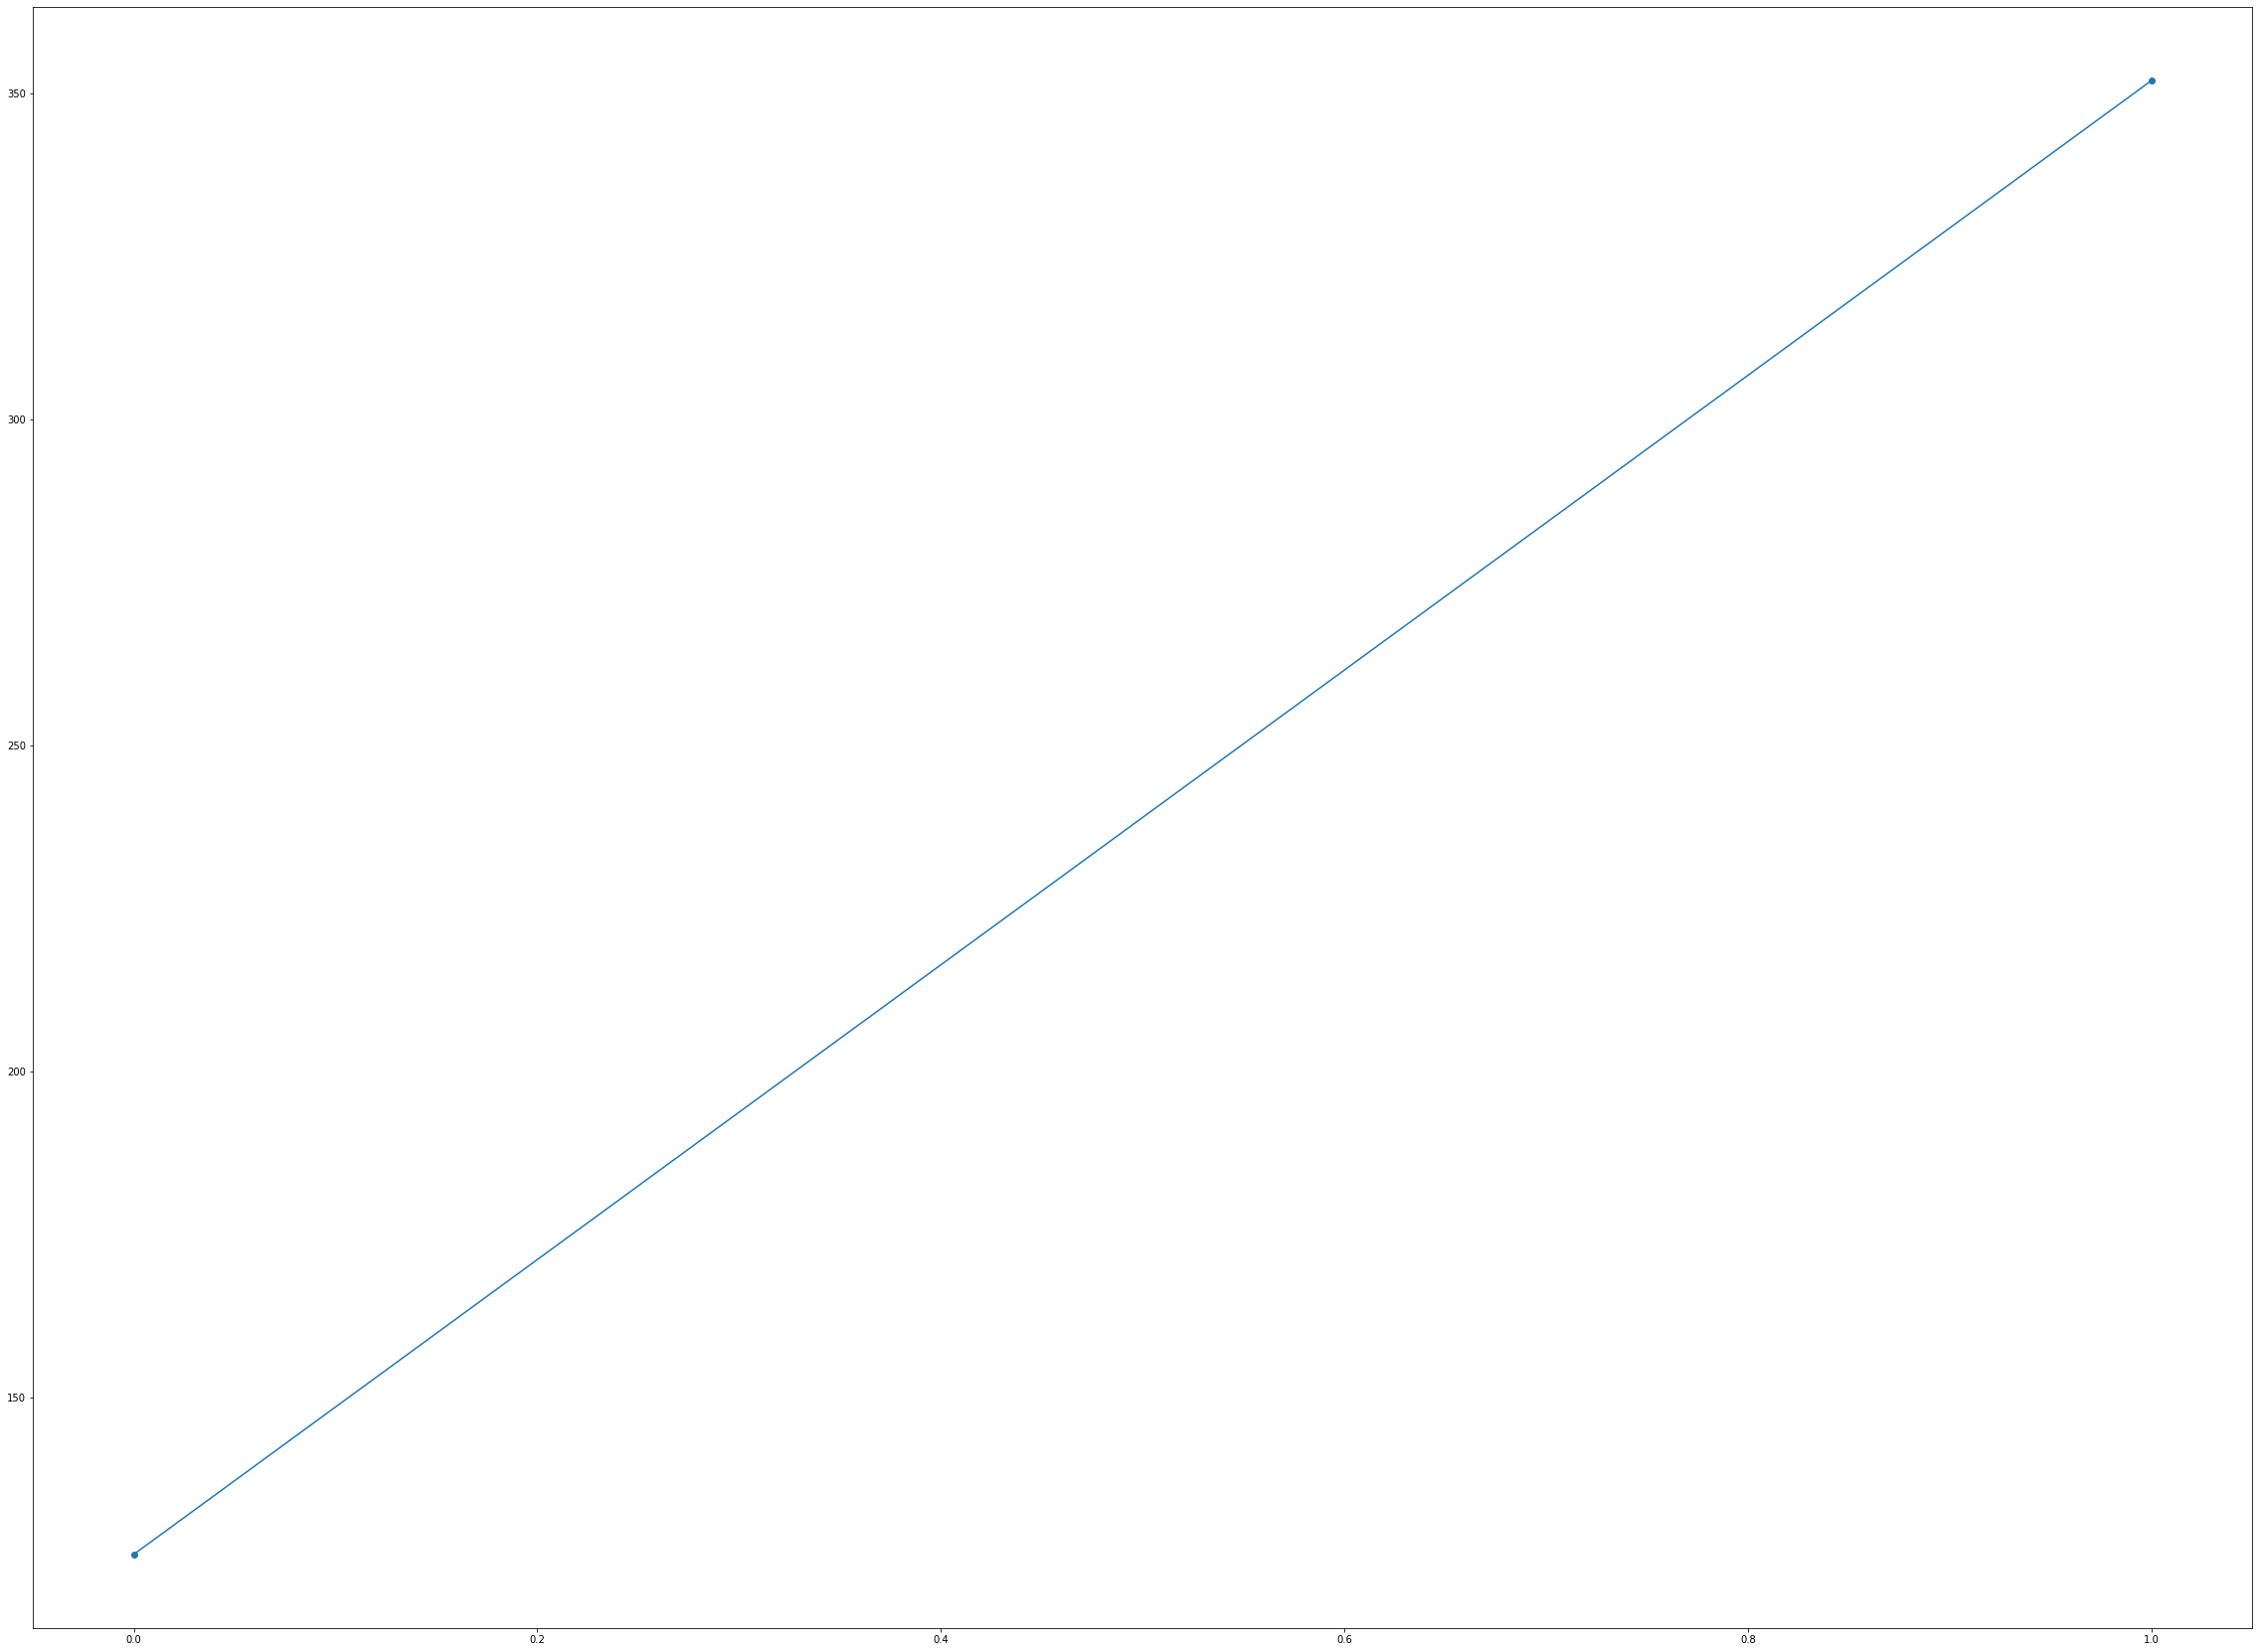

"Great White 30 Recycled Copy Paper"
<class 'list'>
{398, 335}
The mean is ：366.500000
The standard div is ：31.500000


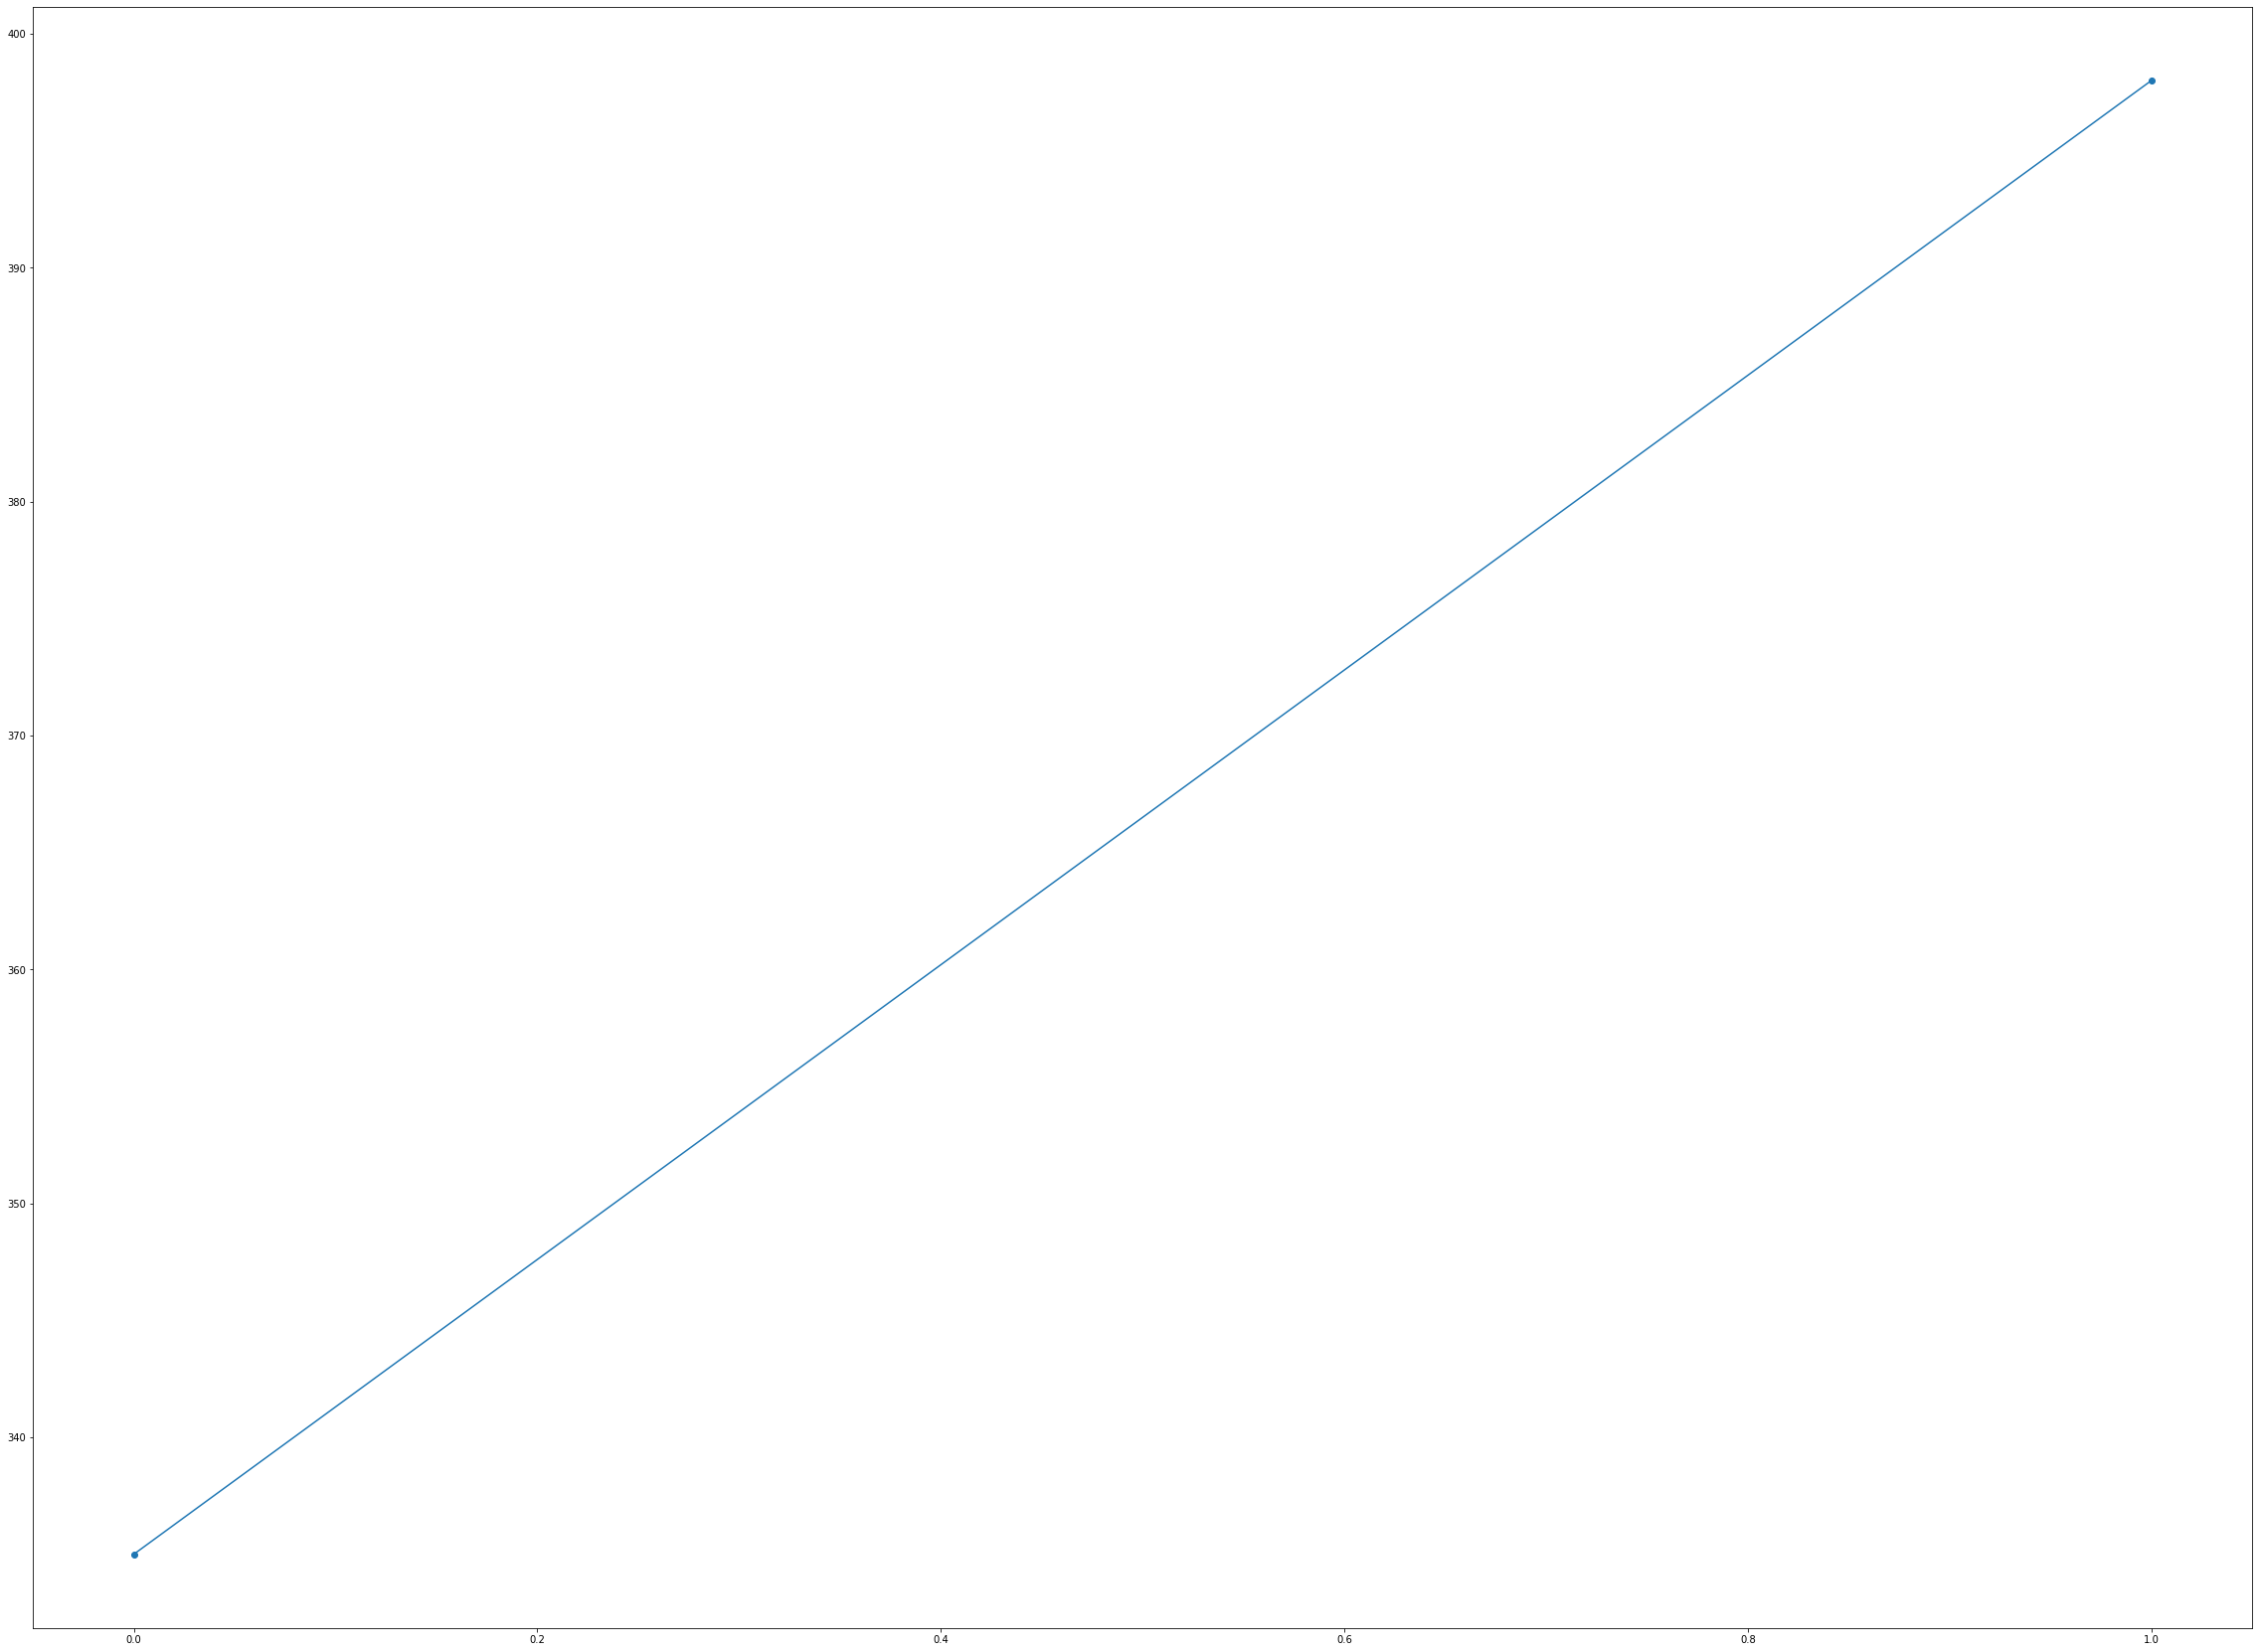

In [57]:
find_thepaper_gap(paper_name[:-3])

In [50]:
h = paper_name[0]
a1=paper_df[paper_df['Description'].str.contains(h)]['Requisitioning Date'].tolist()
print(type(a1))
a1 = sorted(a1)
a1[200:300]

<class 'list'>


[Timestamp('2018-12-04 00:00:00'),
 Timestamp('2018-12-04 00:00:00'),
 Timestamp('2018-12-04 00:00:00'),
 Timestamp('2018-12-04 00:00:00'),
 Timestamp('2018-12-04 00:00:00'),
 Timestamp('2018-12-05 00:00:00'),
 Timestamp('2018-12-05 00:00:00'),
 Timestamp('2018-12-05 00:00:00'),
 Timestamp('2018-12-07 00:00:00'),
 Timestamp('2018-12-07 00:00:00'),
 Timestamp('2018-12-07 00:00:00'),
 Timestamp('2018-12-10 00:00:00'),
 Timestamp('2018-12-10 00:00:00'),
 Timestamp('2018-12-11 00:00:00'),
 Timestamp('2018-12-11 00:00:00'),
 Timestamp('2018-12-11 00:00:00'),
 Timestamp('2018-12-11 00:00:00'),
 Timestamp('2018-12-12 00:00:00'),
 Timestamp('2018-12-12 00:00:00'),
 Timestamp('2018-12-12 00:00:00'),
 Timestamp('2018-12-12 00:00:00'),
 Timestamp('2018-12-12 00:00:00'),
 Timestamp('2018-12-12 00:00:00'),
 Timestamp('2018-12-12 00:00:00'),
 Timestamp('2018-12-12 00:00:00'),
 Timestamp('2018-12-12 00:00:00'),
 Timestamp('2018-12-12 00:00:00'),
 Timestamp('2018-12-12 00:00:00'),
 Timestamp('2018-12-

In [40]:
toner_req = df[df['Category'] == 'Toner/Ink']
toner_req

,Requisition ID,Requisitioning Date,Supplier - ERP Supplier,Description,Requester - Shopper ID,Part - Supplier Part Number,sum(Requisition Spend),LDescription,Category,Year group,trimmed date shoppper part,matchnumber,Unit,Unit name,funds center,fc name
1,SH449839,2018-11-26,WB Mason Company,"C-59311433|5821081290|78A, (CE278A) Black Orig...",JMORAN,HEWCE278A,43.75,"c-59311433|5821081290|78a, (ce278a) black orig...",Toner/Ink,2018,43430HEWCE278AJMORAN,28847,ZBU_ORG_U189,EVENTS & CONFERENCES,1890010000,Internal Event Administration
3,SH452999,2018-12-06,WB Mason Company,"C-59620403|5822419340|12A, (Q2612A) Black Orig...",JMALZONE,HEWQ2612A,127.89,"c-59620403|5822419340|12a, (q2612a) black orig...",Toner/Ink,2018,43440HEWQ2612AJMALZONE,31633,ZBU_ORG_U120,COLLEGE OF ARTS AND SCIS (CAS),1202060000,CAS ECONOMICS
4,SH453242,2018-12-06,WB Mason Company,C-59637773|5822492854|70C1HM0 (LEX-701HM) High...,JANEMAH,LEX70C1HM0,136.29,c-59637773|5822492854|70c1hm0 (lex-701hm) high...,Toner/Ink,2018,43440LEX70C1HM0JANEMAH,31656,ZBU_ORG_U257,SCHOOL OF MEDICINE (BUSM),2572020000,BS--BIOCHEMISTRY
5,SH453130,2018-12-06,WB Mason Company,"C-59629510|5822458575|UG5591 Toner, 3000 Page-...",SZRETER,PANUG5591,110.50,"c-59629510|5822458575|ug5591 toner, 3000 page-...",Toner/Ink,2018,43440PANUG5591SZRETER,31737,ZBU_ORG_U257,SCHOOL OF MEDICINE (BUSM),2574000000,CNTR MED--ARTHRITIS CENTER
6,SH453192,2018-12-06,WB Mason Company,"C-59632990|5822472357|82, (C4912A) Magenta Ori...",EFLAGG,HEWC4912A,24.30,"c-59632990|5822472357|82, (c4912a) magenta ori...",Toner/Ink,2018,43440HEWC4912AEFLAGG,31619,ZBU_ORG_U124,COLLEGE OF ENGINEERING (ENG),1242060000,ENG DIV OF SYSTEMS ENG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,PR24117-V2,2020-11-18,WB Mason Company,"62XL Ink Cartridge, Black (C2P05AN)",KSTEFANI,HEWC2P05AN,37.40,"62xl ink cartridge, black (c2p05an)",Toner/Ink,2020,44153HEWC2P05ANKSTEFANI,no match to bus,no match to bus,no match to bus,no match to bus,no match to bus
7840,PR22162,2020-11-10,WB Mason Company,"951 Ink Cartridges - Cyan, Magenta, Yellow, 3 ...",SGSMITH,HEWCR314FN,35.39,"951 ink cartridges - cyan, magenta, yellow, 3 ...",Toner/Ink,2020,44145HEWCR314FNSGSMITH,no match to bus,no match to bus,no match to bus,no match to bus,no match to bus
7843,PR19601,2020-10-28,WB Mason Company,"414A (W2021A) Toner Cartridge, Cyan",MMB,HEWW2021A,219.98,"414a (w2021a) toner cartridge, cyan",Toner/Ink,2020,44132HEWW2021AMMB,no match to bus,no match to bus,no match to bus,no match to bus,no match to bus
7844,PR23241,2020-11-13,WB Mason Company,"Retractable Permanent Marker, Ultra Fine Point...",MDEPAS,SAN1735790,22.90,"retractable permanent marker, ultra fine point...",Toner/Ink,2020,44148SAN1735790MDEPAS,no match to bus,no match to bus,no match to bus,no match to bus,no match to bus


In [41]:
toner_req[toner_req['Description'].str.contains('Black')]['Description'].value_counts()

63 Ink Cartridges - Black, Tri-color, 2 Cartridges (L0R46AN)                                     7
58A (CF258A) Toner Cartridge, Black                                                              6
950XL Ink Cartridge, Black (CN045AN)                                                             6
62XL Ink Cartridge, Black (C2P05AN)                                                              5
87X (CF287X) Toner Cartridge, Black High Yield                                                   5
                                                                                                ..
C-56753821|5810124123|410A (CF410A) Black Original LaserJet Toner Cartridge, 2,300 Page-Yield    1
C-56283630|5808007915|508X, (CF360X) High Yield Black Original LaserJet Toner Cartridge          1
C-67524717|5855628398|201A, (CF400A) Black Original LaserJet Toner Cartridge                     1
C-57272729|5812431869|T786120D2 (786) DURABrite Ultra Ink, Black                                 1
C-59439864

In [42]:
len(toner_req['Description'].unique())

3648

In [43]:
toner_req['Description'].str.contains("black original laserjet toner cartridge")

1       False
3       False
4       False
5       False
6       False
        ...  
7837    False
7840    False
7843    False
7844    False
7848    False
Name: Description, Length: 3807, dtype: bool

In [44]:
def find_thetoner_gap(name):
  for h in name:
    print('"{0}"'.format(h))
    a1=toner_req[toner_req['Description'].str.contains(h)]['Requisitioning Date'].tolist()
    print(type(a1))
    a1 = sorted(a1)

    
    a11 = []
    for i in range(len(a1)-1):
      a11.append((a1[i+1]-a1[i]).days)
    # print(a11)
    
    arr_mean=(np.mean(a11))
    arr_std=(np.std(a11))

    print("The mean is ：%f" % arr_mean)

    print("The standard div is ：%f" % arr_std)
    plt.plot(range(len(a11)), a11, '-o')
    plt.rcParams["figure.figsize"] = (40,30)
    plt.show()

"LaserJet Toner Cartridge"
<class 'list'>
The mean is ：0.458399
The standard div is ：8.130620


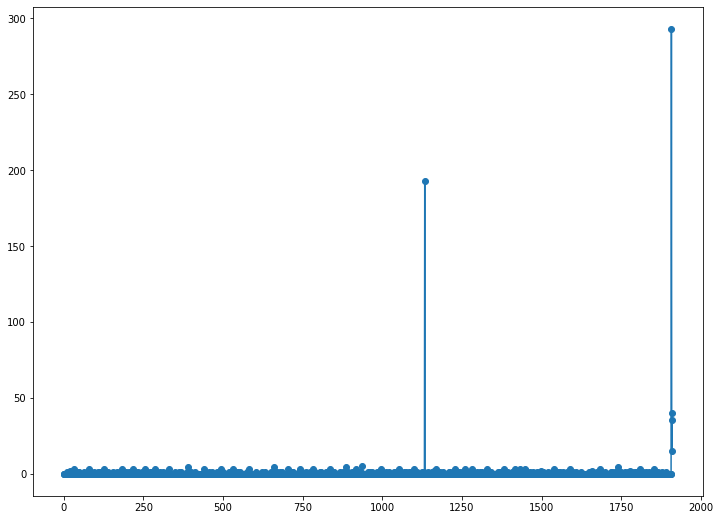

"Ink Cartridge"
<class 'list'>
The mean is ：1.240109
The standard div is ：12.318961


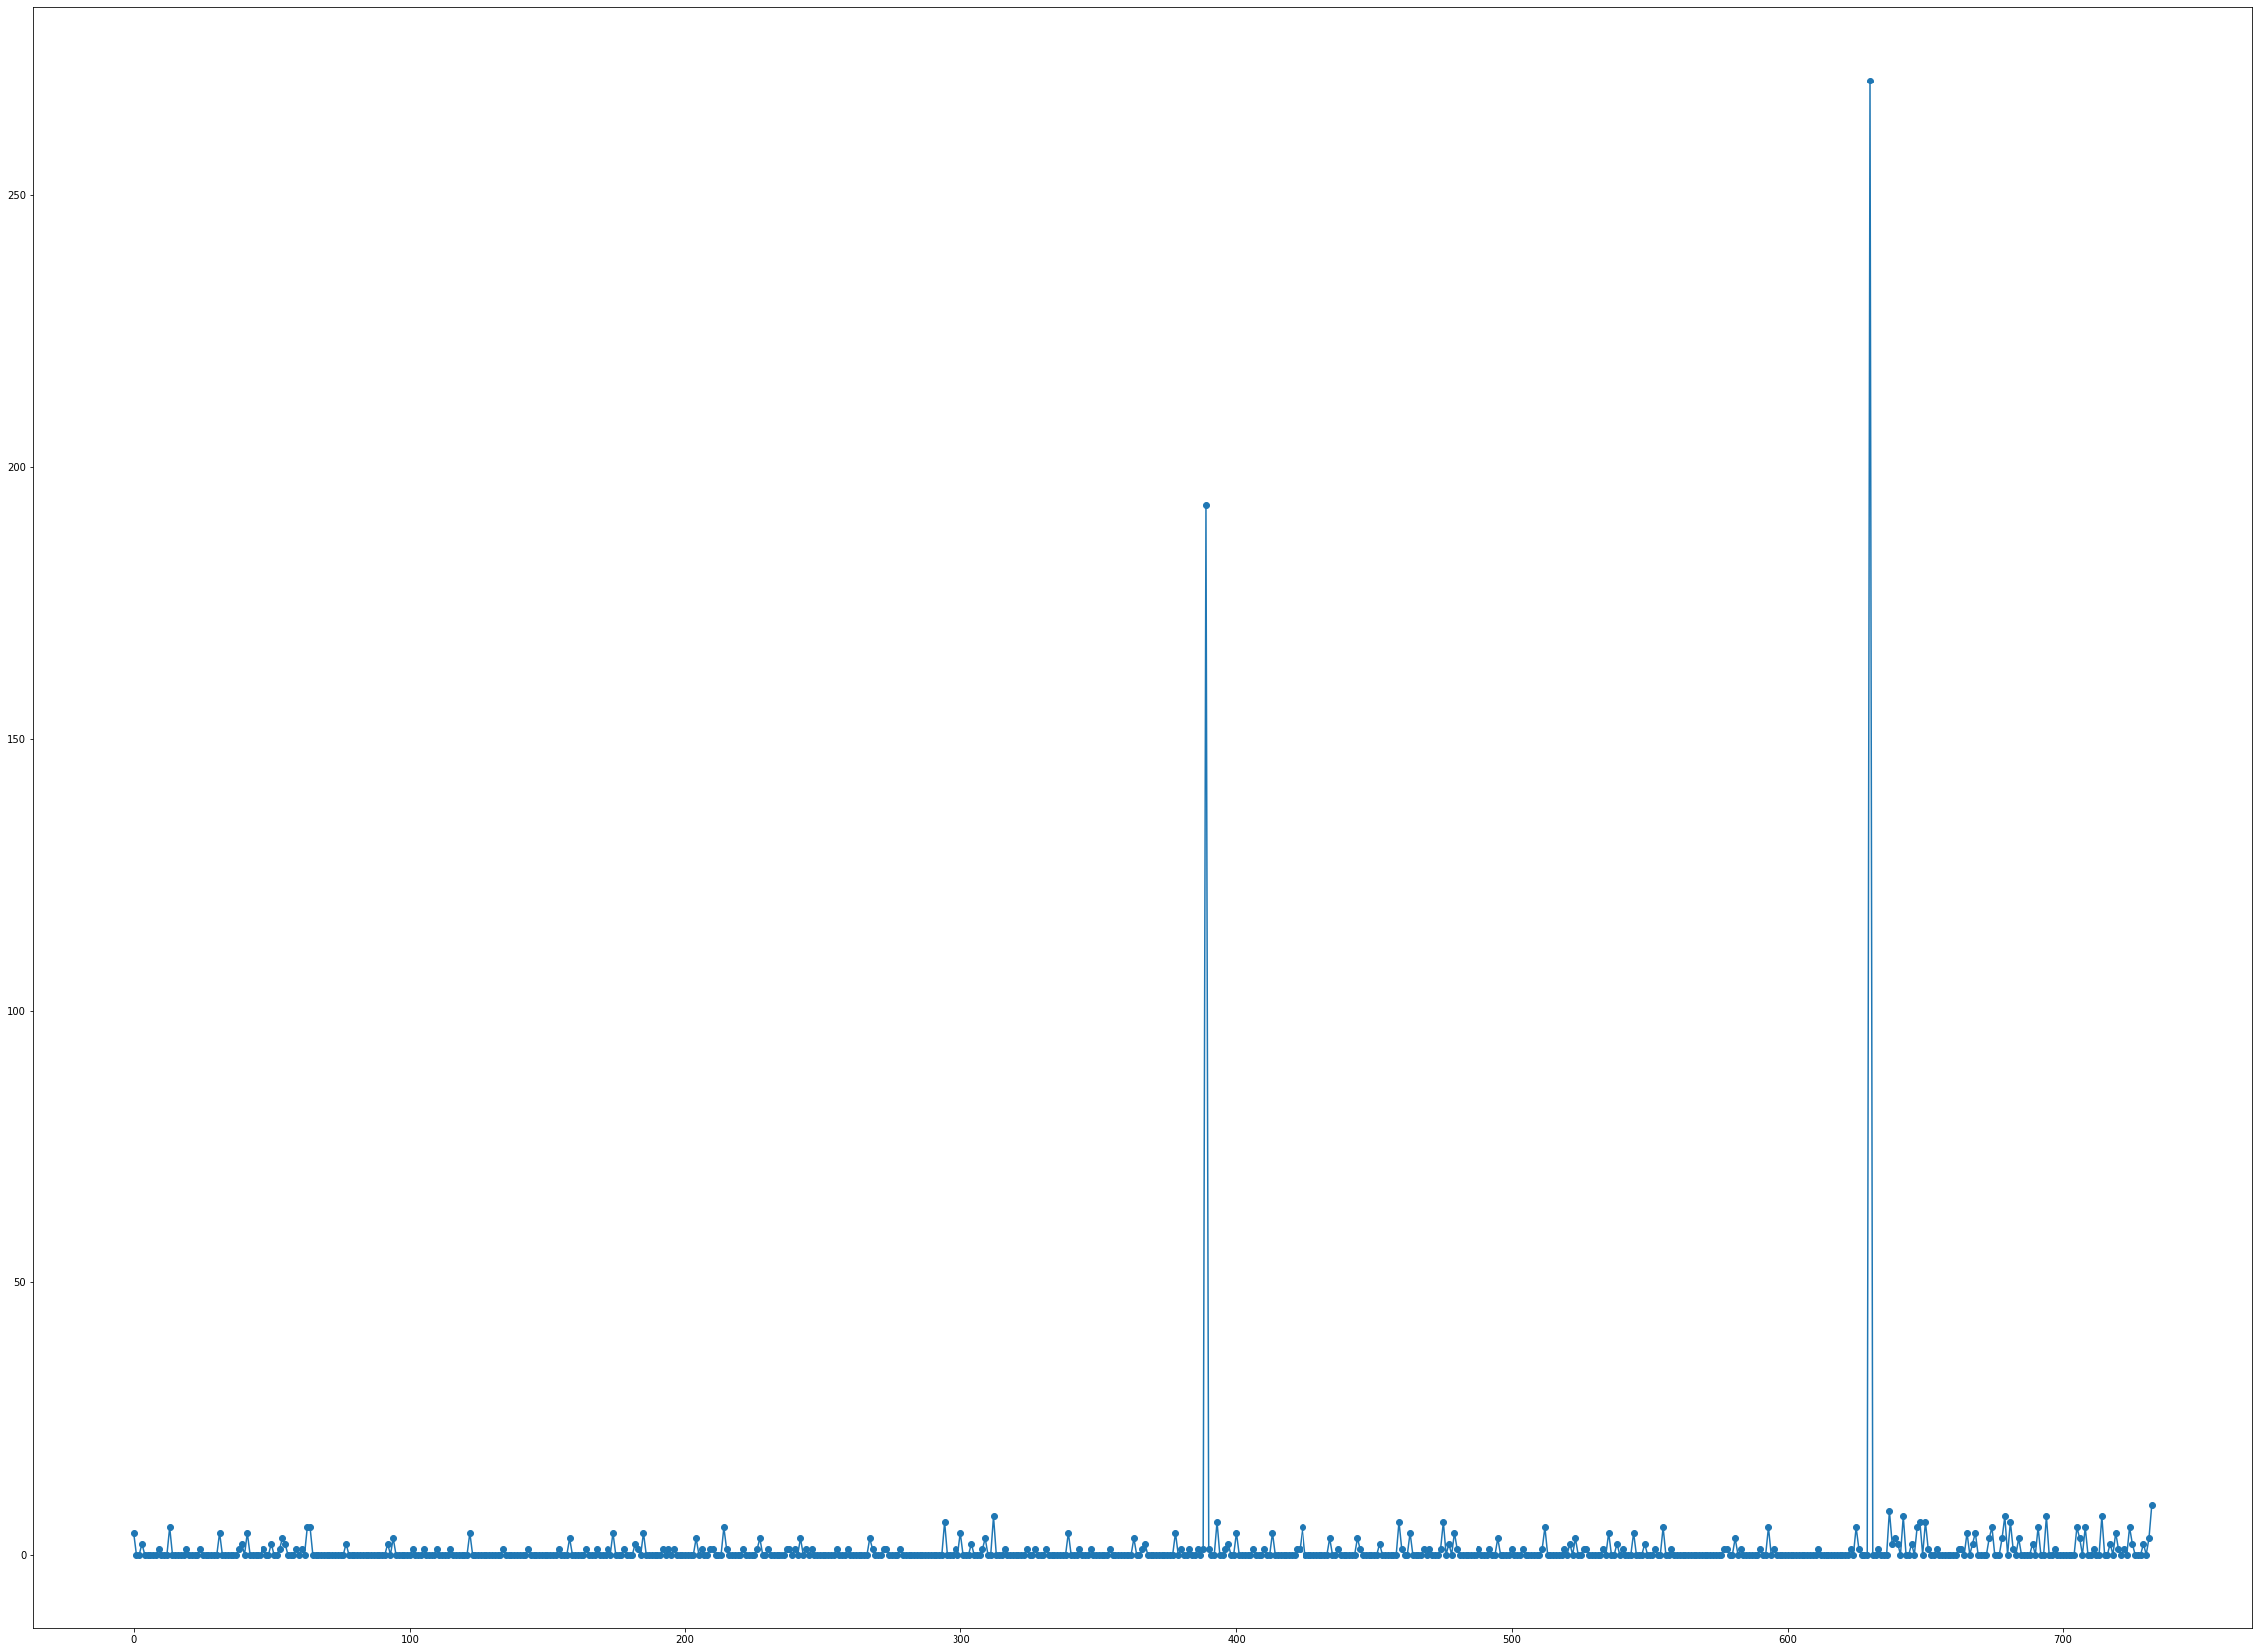

"Black Original LaserJet Toner Cartridge"
<class 'list'>
The mean is ：0.827977
The standard div is ：13.180537


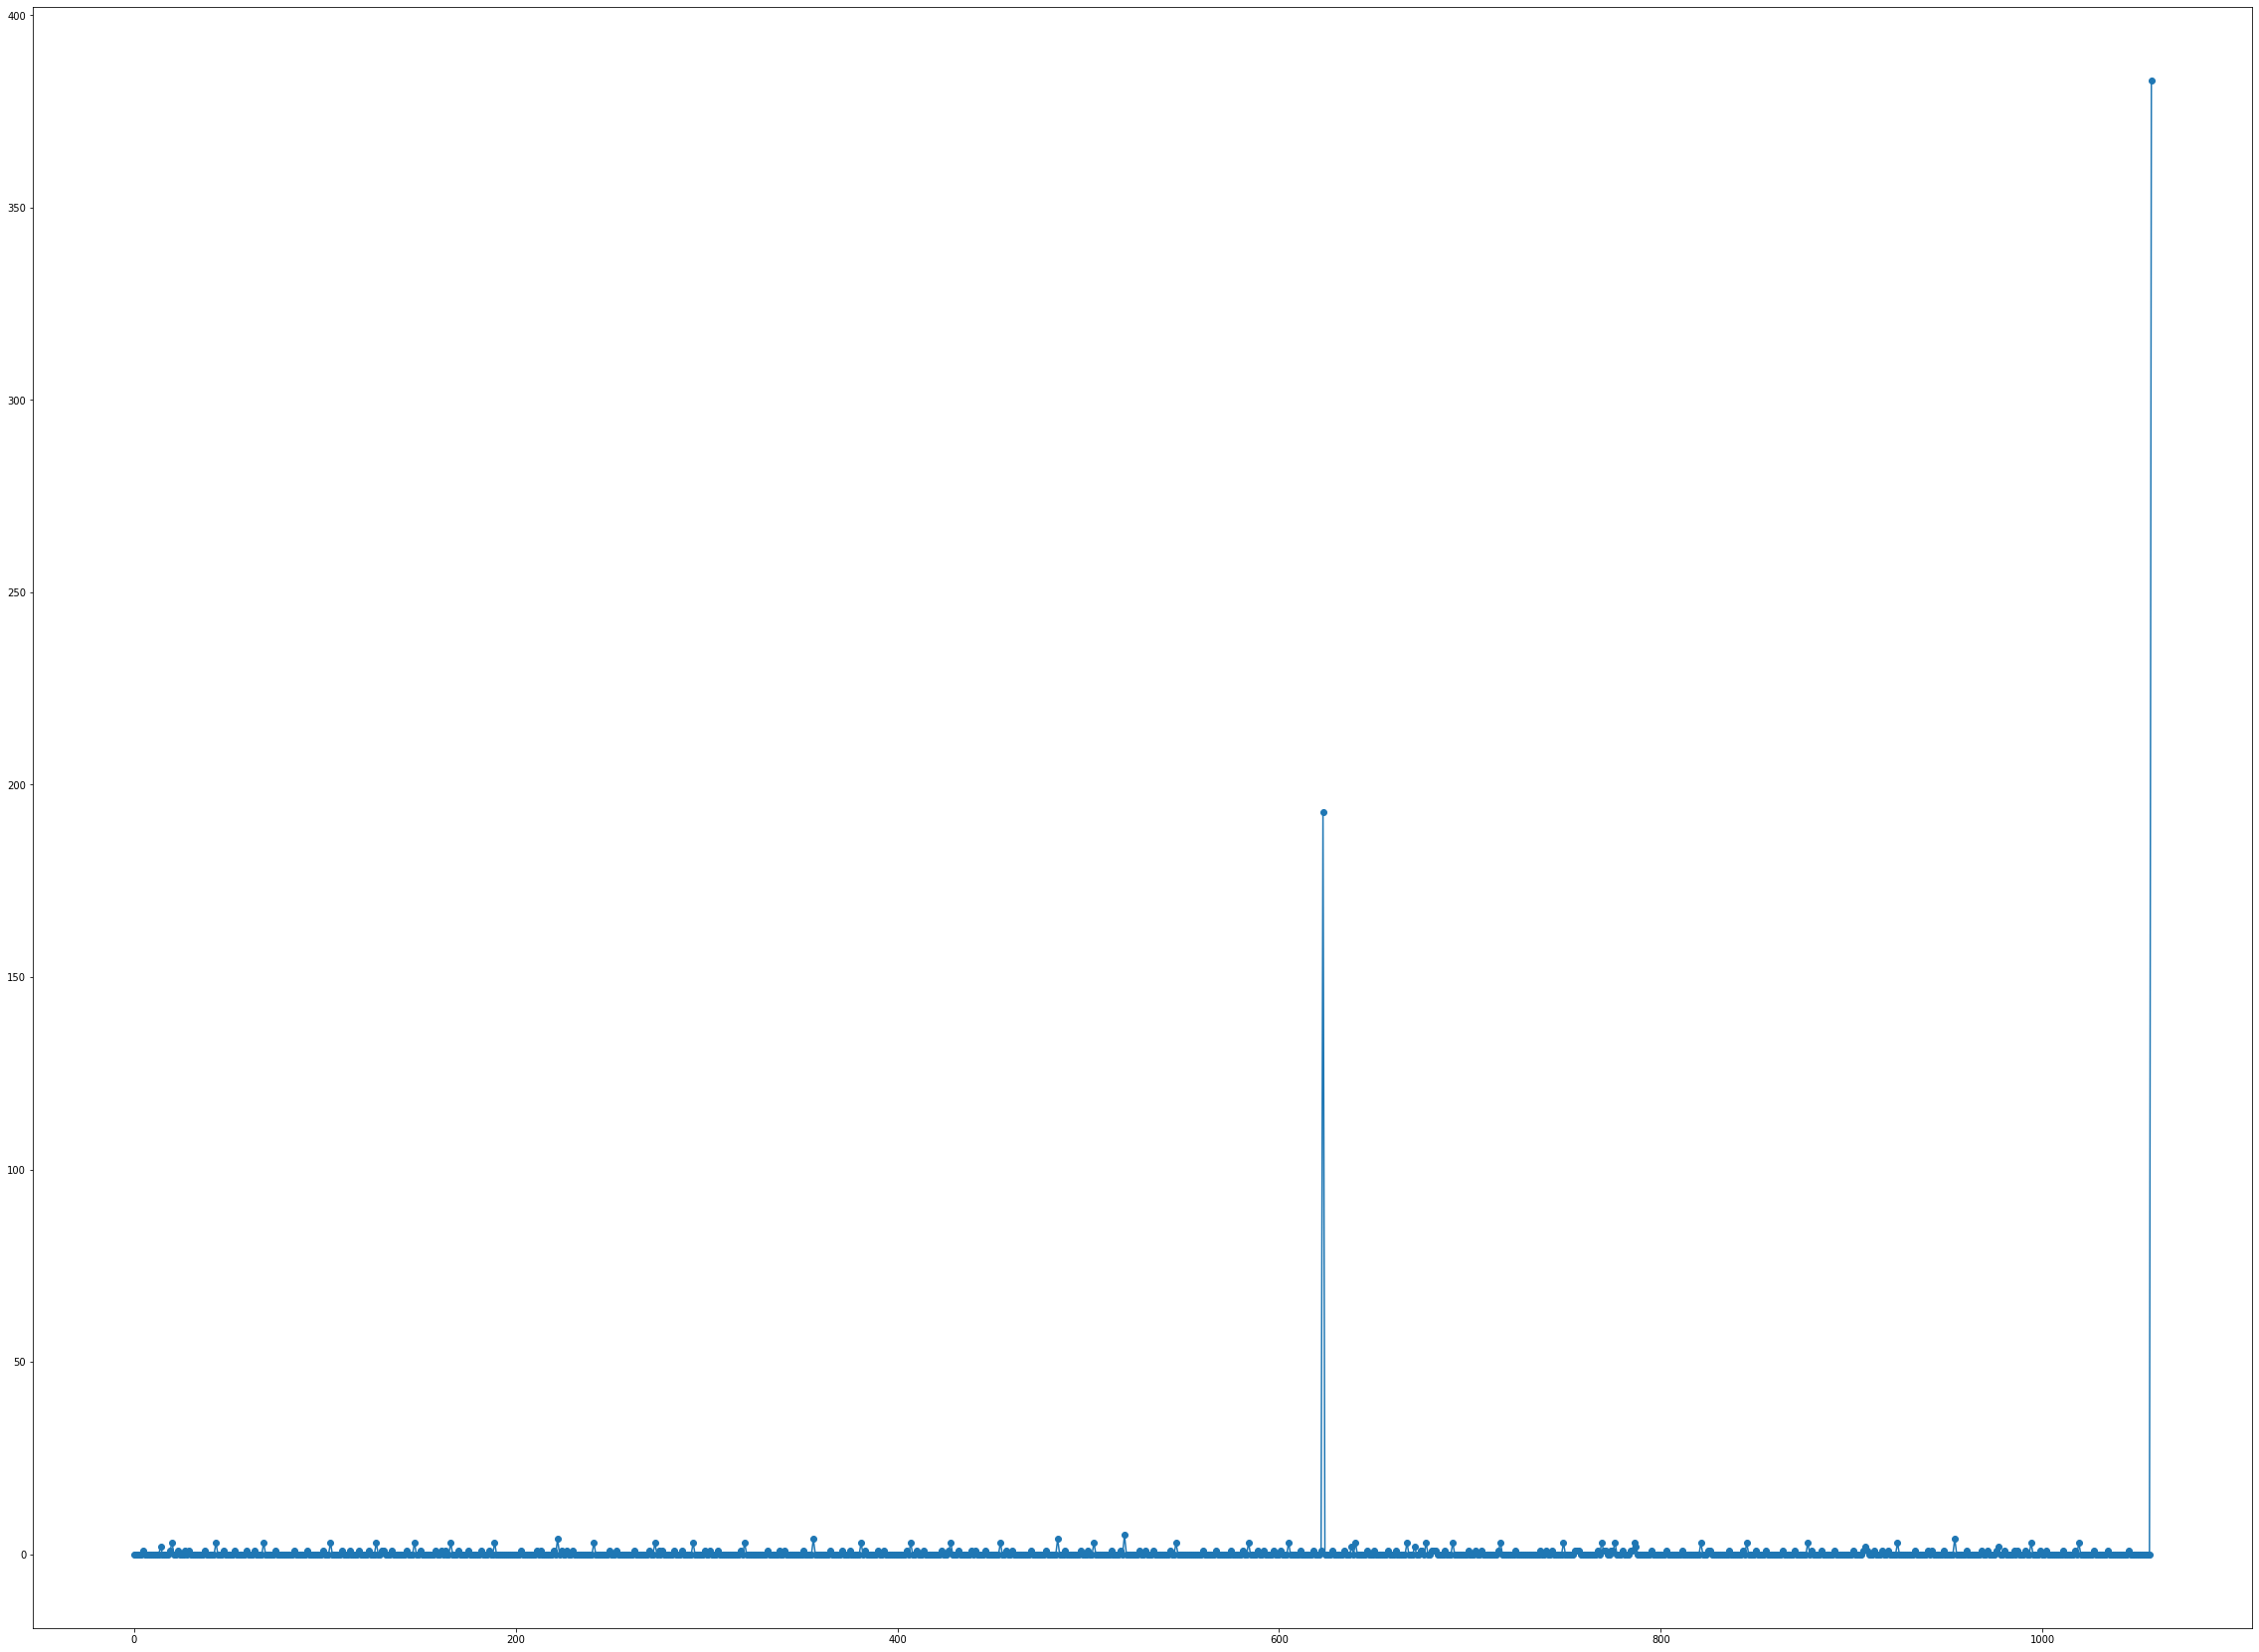

In [45]:
toner_name = ["LaserJet Toner Cartridge", "Ink Cartridge", "Black Original LaserJet Toner Cartridge"]
find_thetoner_gap(toner_name)

In [46]:
h1 = toner_name[0]
a2=toner_req[toner_req['Description'].str.contains(h1)]['Requisitioning Date'].tolist()
print(type(a2))
a2 = sorted(a2)
a2

<class 'list'>


[Timestamp('2018-07-02 00:00:00'),
 Timestamp('2018-07-02 00:00:00'),
 Timestamp('2018-07-02 00:00:00'),
 Timestamp('2018-07-02 00:00:00'),
 Timestamp('2018-07-02 00:00:00'),
 Timestamp('2018-07-02 00:00:00'),
 Timestamp('2018-07-02 00:00:00'),
 Timestamp('2018-07-02 00:00:00'),
 Timestamp('2018-07-02 00:00:00'),
 Timestamp('2018-07-02 00:00:00'),
 Timestamp('2018-07-02 00:00:00'),
 Timestamp('2018-07-02 00:00:00'),
 Timestamp('2018-07-02 00:00:00'),
 Timestamp('2018-07-03 00:00:00'),
 Timestamp('2018-07-03 00:00:00'),
 Timestamp('2018-07-03 00:00:00'),
 Timestamp('2018-07-03 00:00:00'),
 Timestamp('2018-07-03 00:00:00'),
 Timestamp('2018-07-03 00:00:00'),
 Timestamp('2018-07-03 00:00:00'),
 Timestamp('2018-07-03 00:00:00'),
 Timestamp('2018-07-03 00:00:00'),
 Timestamp('2018-07-05 00:00:00'),
 Timestamp('2018-07-05 00:00:00'),
 Timestamp('2018-07-05 00:00:00'),
 Timestamp('2018-07-05 00:00:00'),
 Timestamp('2018-07-05 00:00:00'),
 Timestamp('2018-07-05 00:00:00'),
 Timestamp('2018-07-